# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones
# Materia: Introducción al Aprendizaje Automático
**Trabajo Práctico Entregable 1**


**Regresión en Boston**


**Grupo 22. Integrantes:**
* Carazo, Fernando Diego
* Cardellino, Fernando.
* Ferrero, Nicolás.
* Molina, Florencia
* Pizarro, Rodrigo. 


**Consigna**


En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [41]:
# I-  ===========================  importacion de modulos/librerias-.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston  # @ cargar el DS-.
import seaborn as sns
from matplotlib import gridspec
import scipy.stats as st

In [42]:
# @ AA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,\
    mean_absolute_error,\
    mean_squared_error,\
    explained_variance_score,\
    max_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [44]:
# @ regularizacion
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [45]:
# @ grafico 3d-.
from mpl_toolkits.mplot3d import Axes3D

## Carga del Conjunto de Datos

Cargamos el conjunto de datos a evaluar, chequeamos las keys y los valores de la llave  key 'feature_names' nombres de los atributos para cada columna de 'data'.

In [46]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [47]:
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Chequeamos el tipo de dato y la cantidad de filas y columnas de la matriz con los datos de entrada (atributos) y con el número de filas de la variable/característica target.

In [48]:
print(type(boston))

<class 'sklearn.utils.Bunch'>


bunch: objetos agrupados (@ funciones y métodos) que permiten acceder a los atributos por clave, bunch["value_key"] o por un atributo, bunch.value_key, ej:

In [49]:
boston['data'].shape, boston.target.shape

((506, 13), (506,))

Convertimos el dataSet de sklearn a un objeto PandsDataFrame y agregamos la variable MEDV == target del DF.-

In [50]:
# transform DS to PandasDataFrame-.
df = pd.DataFrame(boston.data, columns=boston.feature_names)

df['target'] = boston.target  # agregamos la variable MEDV == target del DF.-

print('{0}{1} ******** Descripcion del dataset ******** {2}{3}'.
      format('\n', '\t', boston['DESCR'], '\n')) # descripcion del dataset-.


	 ******** Descripcion del dataset ******** .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value proper

Visualizamos las primers 5 (cinco filas) del Pandas Data Frame (PDF).

In [51]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

1. Descripcion/caracteristicas del DataSet (DS):


Cada registro/fila del DS corresponde a una *ciudad o suburbio* de Boston. Inicialmente el DS fue hecho por el SMSA (Boston Standard Metropolitan Statistical en 1970). Los creadores del DS son Harrison, D. and Rubinfeld, D.L.; este DS es una copia del  UCI ML housing dataset. https://archive.ics.uci.edu/ml/machine-learning-databases/housing/ y fue tomado del StatLib library el cual es mantenido por la Universidad de
Carnie Mellon-.


IMPORTANTE: el DS, tal como esta, presenta problemas ÉTICOS (para mi vinculados a DISCRIMINACIÓN RACIAL Y 
SOCIAL en su lugar debería trabajarse con el DS original).


data_url = "http://lib.stat.cmu.edu/datasets/boston"
```
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=Noneraw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None¨)
```


* Numero de casos reportados (registros): 506 (registro/fila/ciudad/suburbio)-.
* Numero de atributos/variables predictivas por registro: 13 (trece) -NUMERICAS/CATEGORICAS-. El valor medio (atributo/variable 14) es el blanco u objetivo -notar que la key que corresponde a esta variable, "target", es diferente al key del DS "MEDV"-.


Descripcioón/características del DataSet (DS): DS con los PRECIOS y algunas características/atributos de casas en diferentes lugares (suburbios/ciudades) de Boston-.

2. ¿Cuál es la variable objetivo que hay que predecir?, ¿Qué significado tiene?.


La variable objetivo (target) es MDEV/target: representa el precio medio  de las casas en miles de dólares norteamericanos-.


3. ¿Qué información (atributos) hay disponibles para hacer la predicción?.


Las variables/atributos (columnas) corresponden a (tomado de la UCI Machine Learning Repository):
* CRIM   : tasa de crimen/per cápita por ciudad/suburbio.
* ZN     : proporción de lotes en zona residencial @ lotes de >25000 pies cuadrados.
* INDUS  : proporción de acres (1 acre = 0.4-0.5 hectareas) comerciales no minoristas por ciudad.
* CHAS   : variable ficticia de Charles River (= 1 si limita con el río, 0 si no lo hace.
* NOX    : concentración de Óxido Nítrico (1 parte por 10 millones).*
* RM     : número promedio de habitaciones por vivienda-.
* AGE    : proporción de unidades ocupadas por sus dueños construidas antes de 1940.
* DIS    : distancias ponderadas a 5 centros de empleo en Boston.
* RAD    : índice de accesibilidad a la carretera radial.
* TAX    : impuesto a la propiedad de valor total por USD 10000.
* PTRATIO: relación alumno/maestro por ciudad.
* B      : 1000 (Bk−0.63)2 donde Bk es la proporción de negros por ciudad.
* LSTAT  : porcentaje de la población de bajo estrato social.


4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?.
* RM     : número promedio de habitaciones por vivienda.
* DIS    : distancias ponderadas a 5 centros de empleo en Boston.
* TAX    : impuesto a la propiedad de valor total por USD 10000.



5. ¿Qué problemas observa a priori en el conjunto de datos?. ¿Observa posibles sesgos, riesgos, dilemas éticos, etc.?. Piense que los datos pueden ser utilizados para hacer predicciones futuras.


El DS presenta problemas ÉTICOS (vinculados a DISCRIMINACIÓN RACIAL Y  SOCIAL; proporción de negros por ciudad, población de estatus bajo y tasa de criminalidad per cápita por ciudad), en su lugar debería trabajarse con el DS original.

# Análisis adicional:

Visualizamos el DS para chequear si existen valores nulos, tipos de Datos (TdD), cantidad de datos, balanceo de datos, etc. y la estadística descriptiva

In [52]:
# adicional, visualizamos el DS @ chequear si existen valores nulos,
# Tipos de Datos (TdD), cantidad de datos, balanceo de datos, etc.
print(df.columns) # listo las columnas-.
print(df.describe().T) # estadistica descriptiva del DS-.

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')
         count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.

In [53]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')


Al analizar los valores mínimos, medios y máximos de las  variables/atributos numéricos se desprende que corresponden a cantidades de diferentes naturaleza a las cuales les corresponde diferentes "escalas" y "unidades".


El aspecto mencionado será importante y deberá tenerse en cuenta a la hora de seleccionar y aplicar un modelo de aprendizaje automático (AA). Posteriormente y en función de los resultados que se obtengan al aplicar un modelo de AA, se deberán aplicar TRANSFORMACIONES tendientes a mejorar la performance de los modelos usados en el estudio.

Verificamos si existen datos repetidos

In [54]:
print(df.duplicated()) # chequeo si existen datos DUPLICADOS-.
if df.duplicated().sum() == 0:
    print('No existen datos repetidos')
else:
    print('Cantidad de datos repetidos {0}'.
          format(df.duplicated().sum()))

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool
No existen datos repetidos


Chequeo si exsiten datos nulos.

In [55]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64


Chequeo si exsiten datos NaNs.

In [56]:
print(df.isna().sum()) # chequeo explicito si exi. NaNs-.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64


Imprimo la cantidad de registros de cada variable no nulos y los TdD correspondientes.

In [57]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


A partir de la observacion de los TdD de las variables del DS, identifico dos variables que son "categóricas", las imprimo para chequear.

In [58]:
print(df.loc[:,['RAD', 'CHAS']]) # idem print(df[df['RAD', 'CHAS']])
print(df.loc[:,'RAD'].unique())
print(df.loc[:,'CHAS'].unique())

     RAD  CHAS
0    1.0   0.0
1    2.0   0.0
2    2.0   0.0
3    3.0   0.0
4    3.0   0.0
..   ...   ...
501  1.0   0.0
502  1.0   0.0
503  1.0   0.0
504  1.0   0.0
505  1.0   0.0

[506 rows x 2 columns]
[ 1.  2.  3.  5.  4.  8.  6.  7. 24.]
[0. 1.]


Claramente son variables categóricas:
* RAD: variable categórica ordinal que toma los valores: 1, 2, 3, 4, 5, 6, 7, 8, 24. NOTA: no entiendo que significa cada índice ni su implicancia-.
* CHAS: variable categórica nominal binaria. Toma los valores: 0 y 1-.

Convierto ambas variables a enteras

In [59]:
# convierto ambas variables a enteras-.
cols_to_convert = {
    'RAD': np.int64,
    'CHAS': np.int64
}
df = df.astype(cols_to_convert)


print(df.dtypes)
print(df.loc[:,['RAD', 'CHAS']])
print('Valores unicos de la variable {0}{1}{2}'.
      format('RAD', '\n', df.loc[:,'RAD'].unique()))
print('Valores unicos de la variable {0}{1}{2}'.
      format('CHAS', '\n', df.loc[:,'CHAS'].unique()))
print('Total de cada valor unico de la variable {0}{1}{2}'.
      format('RAD', '\n', df.loc[:,'RAD'].value_counts()))
print('Total de cada valor unico de la variable {0}{1}{2}'.
      format('CHAS', '\n', df.loc[:,'CHAS'].value_counts()))

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object
     RAD  CHAS
0      1     0
1      2     0
2      2     0
3      3     0
4      3     0
..   ...   ...
501    1     0
502    1     0
503    1     0
504    1     0
505    1     0

[506 rows x 2 columns]
Valores unicos de la variable RAD
[ 1  2  3  5  4  8  6  7 24]
Valores unicos de la variable CHAS
[0 1]
Total de cada valor unico de la variable RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64
Total de cada valor unico de la variable CHAS
0    471
1     35
Name: CHAS, dtype: int64


1. ANÁLISIS:
* MEDV


El valor de MEDV que corresponde al 3º cuartil en 75% (Q3) es  25m, esto indica que el 75% de los valores de las viviendas de Boston ocupadas por sus propietarios es menor a 25 m. Por otro lado y teniendo en cuenta que el valor máximo de MEDV es 50m, el doble del valor de la misma variable para el Q3, esto refleja que existen pocos registros con valores de MEDV altos y una gran cantidad de  registros cuyo valor de MEDV esta enter 0m y 25m. Se analizará en el siguiente punto empleando encodings visuales.

* ZN (proporción de terreno residencial zonificado para lotes con sup.> 25000 pies cuadrados).

Existen 0% hasta el Q2 y el valor del 3º  cuartil es 12.5% y el máximo 100%. Esto pone de manifiesto que la 
mayoría de los terrenos residenciales corresponden a lotes con sup. < a 25000 pies cuadrados-.

* CHAS (variable ficticia de Charles River -= 1 si limita con el rio, 0 si no lo hace).

Es igual a 0 -cero- hasta el Q3. Claramente, solo el  25% de las personas en Boston viven cerca del río. Ver en los análisis de los encodings visuales (gráficas)-.


* Finalmente podemos decir que las variables/atributos CRIM, ZN, INDUS, NOX, RM, AGE, DIS, y TAX son numéricas continuas de tipo real. En tanto las  variables CHAS y RAD son variables discretas/categóricas (comos se  vió).  Todas las variables y/o atributos cuentan con 506 registros y no presentan datos nulos, ni repetidos ni erróneos.

Examinamos con mayor detalle los % de datos de cada variable correspondientes a OUTLIERS.

In [60]:
def get_out(ps_val, tot_vals):
    iqr = abs(ps_val.quantile(0.25, interpolation='nearest')-
              ps_val.quantile(0.75, interpolation='nearest'))
    llp = ps_val.quantile(0.25) - (1.5*iqr) # lower_limit_point-.
    ulp = ps_val.quantile(0.75) + (1.5*iqr) # upper_limit_point-.
    # check if there is/are outlier/s-.
    if ps_val.min() > llp and ps_val.max() < ulp:
        por_out= 0.0
    else:
        ps_val_col = ps_val[(ps_val < llp) | (ps_val > ulp)]
        por_out= np.shape(ps_val_col)[0]*100/tot_vals
    return por_out

for ps_name, ps_val in df.items():
    por_out = get_out(ps_val, np.shape(df)[0])
    print('Variable {0:<20} {1:<20} {2:>5.2f}{3:>2}'.
          format(ps_name, 'OUTLIERS', por_out, '%'))
    # val = ps_val.apply(get_out, convert_dtype=False)

Variable CRIM                 OUTLIERS             13.04 %
Variable ZN                   OUTLIERS             13.44 %
Variable INDUS                OUTLIERS              0.00 %
Variable CHAS                 OUTLIERS              6.92 %
Variable NOX                  OUTLIERS              0.00 %
Variable RM                   OUTLIERS              5.93 %
Variable AGE                  OUTLIERS              0.00 %
Variable DIS                  OUTLIERS              0.99 %
Variable RAD                  OUTLIERS              0.00 %
Variable TAX                  OUTLIERS              0.00 %
Variable PTRATIO              OUTLIERS              2.96 %
Variable B                    OUTLIERS             15.02 %
Variable LSTAT                OUTLIERS              1.19 %
Variable target               OUTLIERS              7.71 %


Vemos que las variables que presentan OUTLIERS son: CRIM, ZN, CHAS, RM, B y MDEV/target, 13.04%, 13.44%, 6.92%,  5.93%, 15.02% y 7.71% respectivamente. Lo observaremos mediante encodings visuales en el siguiente ejercicio-.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

Antes de contestar los puntos 1-3 de este ejercicio, se añaden una serie de gráficas para visualizar aspectos importantes del dataset que serán tenidos en cuenta posteriormente.

* Visualizamos los OUTLIERS reportados en el punto anterior.

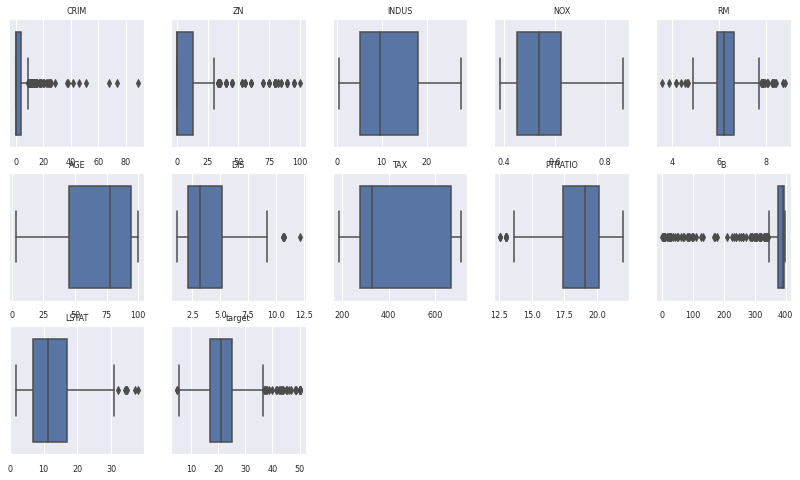

In [61]:
# Adenda 1: visualizamos los OUTLIERS reportados en el punto
#            anterior-.
plt.rc('font', size=8)       # set the axes title font size-.
plt.rc('axes', titlesize=8)  # set the axes labels font size-.
plt.rc('axes', labelsize=8)  # set the font size for x tick labels-.
plt.rc('xtick', labelsize=8) # set the font size for y tick labels-.
plt.rc('ytick', labelsize=8) # set the legend font size-.
plt.rc('legend', fontsize=8) # set the font size of the figure title-.
plt.rc('figure', titlesize=8)

if True: # @ comentado 30052022 --FIG_1--
    cat_cols=['RAD', 'CHAS']
    nrows= 3; ncols=5
    plt.figure(figsize=(14,8))
    df_nums_cols= df.drop(cat_cols, axis=1)
    for idx, col in enumerate(df_nums_cols, start=1):
        plt.subplot(nrows, ncols, idx)
        ax= sns.boxplot(data=df, x=col)
        plt.title(col)
        ax.set_xlabel(None)
#    plt.show()

Al analizar la Figura puede corroborarse los valores de los % de  OUTLIERS reportados al final del Ejercicio 1, es decir: CRIM, ZN,  CHAS, RM, B y MDEV/target; 13.04%, 13.44%, 6.92%, 5.93%, 15.22% y  7.91% respectivamente.


Este aspceto deberá ser tenido en cuenta a la hora de seleccionar y aplicar un modelo de AA (claramente un modelo de AA  mas robusto frente a OUTLIERS como el de Regresion Logística -RLog- aplica mejor que uno de regresión lineal -RL- y/o regresión polinomial -RP-) y/o, si el modelo de AA se  considera dado (ej. RL y/o RP), a la hora de curar los datos para  analizar y comparar las métricas resultantes del modelo con y sin  curación de los OUTLIERS-.

Visualización de las variables categóricas del DS usando gráficos de barras y tortas.

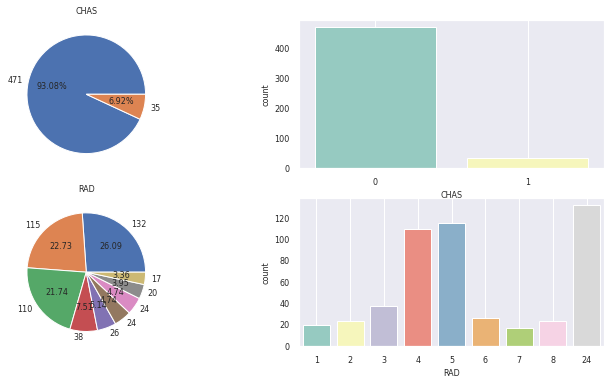

In [62]:
# Adenda 2: visualizacion de las variables categoricas del DS usando
#           graficos de barras y tortas-.
# luego me di cuenta que simplemente con '%.2f%%' se solucionaba
# lo dejo por las dudas (extraida de stackoverflow)-.
if False:
    def autopct_format(values):
        def my_format(pct):
            total = np.sum(values)
            val = int(np.round(pct*total/100.0))
            return '{:.2f}%\n({v:d})'.format(pct, v=val)
        return my_format

if True: # @ comentado 30052022 #--FIG_2--
    nrows= 2; ncols= 2
    figure1, axes= plt.subplots(nrows, ncols, figsize=(12,6)) 
    total= len(df['CHAS'])
    axes[0,0].pie(df['CHAS'].value_counts(),
                  labels= df['CHAS'].value_counts(),
                  autopct='%.2f%%'
                  )
    sns.countplot(x='CHAS',
                  data=df,
                  palette='Set3',
                  ax= axes[0,1]
                  )
    axes[1,0].pie(df['RAD'].value_counts(),
                  labels= df['RAD'].value_counts(),
                  autopct='%.2f'
                  )
    sns.countplot(x='RAD',
                  data=df,
                  palette='Set3',
                  ax= axes[1,1]
                  )
    axes[0,0].set_title('CHAS')
    axes[1,0].set_title('RAD')
    axes[0,1].grid()
    axes[1,1].grid()
# plt.show()

* Se observa que la mayoría de los habitantes de BOSTON viven  en zonas alejadas del RÍO (variable CHAS). Solo un 6.92% vive en zonas cercanas al Río de Boston.
* En lo que respecta a la  variable RAD, índice que indica el acceso a la carretera radial (circunvalación bostoneana?), a 132 casos (26.09%) le corresponde el mayor índice (24); seguidos por 115 y 110  casos, 22.73% y 21.74% respectivamente, a los índices 5 y 4 respectivamente. El resto de los índices, 1, 2, 3, 6, 7 y 8 presentan la menor cantidad de índices variando entre 17 y 38, índices 1 y 3 respectivamente.

Ambas variables serán consideradas para analizar las gráficas de la variable objetivo y/o target en función de los parámetros agrupadas según ambas variables.

Analizo la distribución de los atributos y de la variable target u objetivo-.

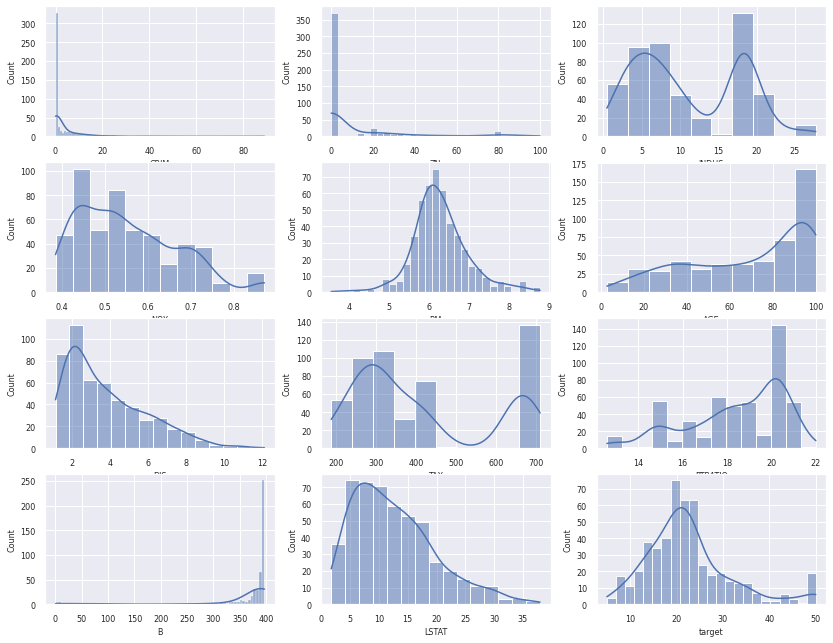

In [63]:
'''
# only to practice lambda function -the code was removed-.
lista = ['RAD', 'CHAS']
target_columns = list(filter(lambda x: x not in
                             lista,
                             df.columns)
                      )
'''
if True: # @ comentado 30052022  #--FIG_3--
    target_columns= list(df[df_nums_cols.columns].columns) # pythonic form-.
    nsfigs= len(target_columns) # number of subfigs-.
    nc= 3
    nr= int(np.ceil(nsfigs/nc))
    # @ gridspec see Arranging multiple Axes in a Figure Matplotlib doc.-.
    gs= gridspec.GridSpec(nr, nc) 
    fig= plt.figure(figsize=(14,11))
    for idx, col in enumerate(target_columns, start=0):
        ax= fig.add_subplot(gs[idx])
        sns.histplot(x= col,
                     data= df, # the same result that with df_nums_cols-.
                     kde= True,
                     ax= ax)

1. Los atributos presentan diferentes tipos de distribuciones. A saber:
* CRIM: exponencial.
* ZN: exponencial.
* INDUS: bimodal.
* NOX: ¿bimodal sesgada hacia la derecha?.
* RM: normal o gaussiana.
* AGE: ¿log-normal bivariada o exponencial?.
* DIS: ¿log-normal?
* TAX: ¿bimodal?.
* PTRATIO: ¿?.
* B: normal-.
* LSTAT: log-normal


Por otro lado, la variable objetivo, target o MDEV tiene una distribución próxima a una normal sesgada hacia la derecha. Esto indica que existen OUTLIERS correspondientes a unos pocos pero grandes valores de la mencionada variable.


* target/MDEV: normal o gaussiana sesgada hacia la derecha-.

Estas características de las variables serán tenidas en cuenta a la hora de:
* procesar y curar los datos,
* y/o previamente a la aplicación del modelo de AA-.

Gráfico de correlación de las diferentes variables (numéricas y categóricas)-.

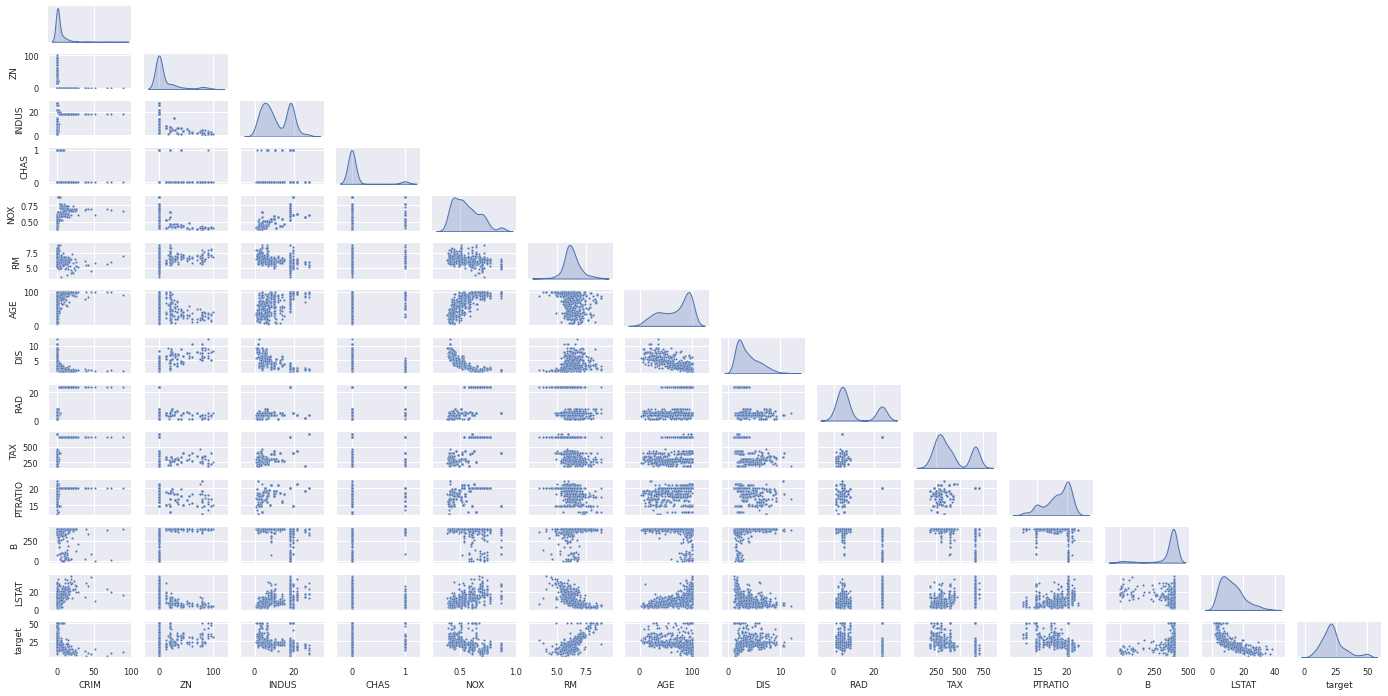

In [109]:
if True: # @ comentado 30052022 --FIG_4--
#    fig= plt.figure(figsize=(100,100))
    sns.plotting_context(font_scale=0.75)
    sns.set(font_scale = 0.75)
    sns.color_palette("rocket", as_cmap=True)
    
    fig= sns.pairplot(df,
                      diag_kind= 'kde',
                      height= 0.7,
                      aspect= 2.0,
                      corner= True,
                      palette='Dark2',
                      #                  hue='CHAS',
                      #                  kind= 'reg',
                      markers='o',
                      diag_kws= dict(shade=True),
                      plot_kws={'s': 5}
                      )

Análisis general: a continuación se efectúa un análisis de correlación de cada una de las variables por separado.
* CRIM: presenta correlación con target, LSTAT, DIS, AGE, y NOX (levemente).
* ZN: presenta correlación con LSTAT, B, TAX, RAD, DIS, AGE, RM  (levemente) con NOX, INDUS.
* INDUS: presenta correlación con RAD, DIS y NOX.
* CHAS: .
* NOX: presenta correlación con DIS, AGE y RM (levemente con las dos últimas).
* RM: presenta correlación con target, LSTAT.
* AGE: presenta correlación con DIS  (levemente).
* DIS: presenta correlación con target, LASTAT.
* RAD: .
* TAX: .
* PTRATIO: .
* B: .
* LSTAT: presenta correlación con target.

Para corroborar los resultados presentados, graficamos la matriz de correlación con heatmap (grado de correlación lineal entre las variables).

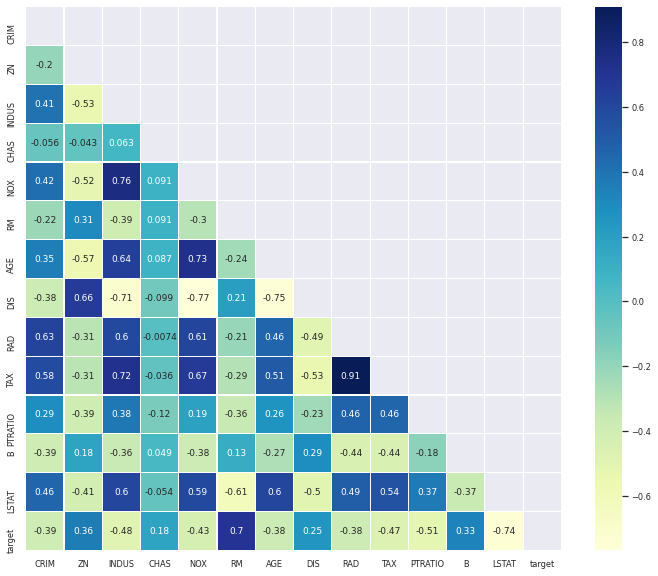

In [108]:
if True: # @ comentado 30052022 --FIG_6--
    corr = df.corr(method='pearson')
    mask = np.triu(np.ones_like(corr, dtype=bool))
    corr= corr.mask(mask)
    figure, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corr,
                ax=ax,
                cmap="YlGnBu",
                linewidths=0.1,
                annot=True
                )

Al analizar la figura vemos que las variables/atributos identificados como l@s más importantes desde el punto de vista de la predicción de la variable objetivo/target (RM positiva y LSTAT negativa) presentan una alta correlación. 


Este aspecto deberá tenerse en cuenta a la hora de aplicar un modelo de AA con el fin de prevenir, ya que: (adapatado de ....): "... las variables/atributos correlacionadas en general no mejoran los  modelos de AA (aunque depende de las características específicas del problema, como el número de variables/atributos y el grado de correlación), sin embargo, afectan modelos específicos de diferentes maneras y en diferentes grados: por ej., en modelos lineales cada variable debe ser independiente, si esto no se da entre dos variables independientes, puede conducir a un sobreajuste u overfitting del modelo, de aquí que en modelos de AA basados en  RL y/o RLog, la multicolinealidad puede dar lugar a soluciones que varían ampliamente y que posiblemente sean numéricamente inestables. Los modelos de Random Forest pueden ser buenos para detectar interacciones entre diferentes atributos/variables, sin embargo los atributos/variables altamente correlacionados pueden enmascarar estas interacciones...".


En general, lo mencionado puede verse como un caso especial de la NAVAJA DE OCCAM Occam's razor). Un modelo simple es preferible y, en gran modo, un modelo con menos features es mas simple. El concepto de LONGITUD MÍNIMA DE DESCRIPCIÓN lo hace más preciso, ver:
* https://en.wikipedia.org/wiki/Multicollinearity#Consequences_of_multicollinearity
* https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/


Luego del análisis realizado y pensando en los puntos que siguen, deberemos pensar en las transformaciones que podríamos usar luego para exponer/poner de manifiesto la estructura del DS en general por medio las cuales podamos mejorar la precisión del modelo de AA. De aquí que tengamos que considerar:
* Una correcta selección de atributos/variables basada en remover los atributos/variables que presentan más correlación (ver comentario anterior),
* Normalización del DS para reducir los efectos de las diferentes escalas de las variables/atributos del DS (ver comentario al Punto 1.5),
* Estandarización del DS @ reducir los efectos de las diferentes distribuciones observadas en los atributos/variables del DS (ver comentario punto).

**2.1 Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo**

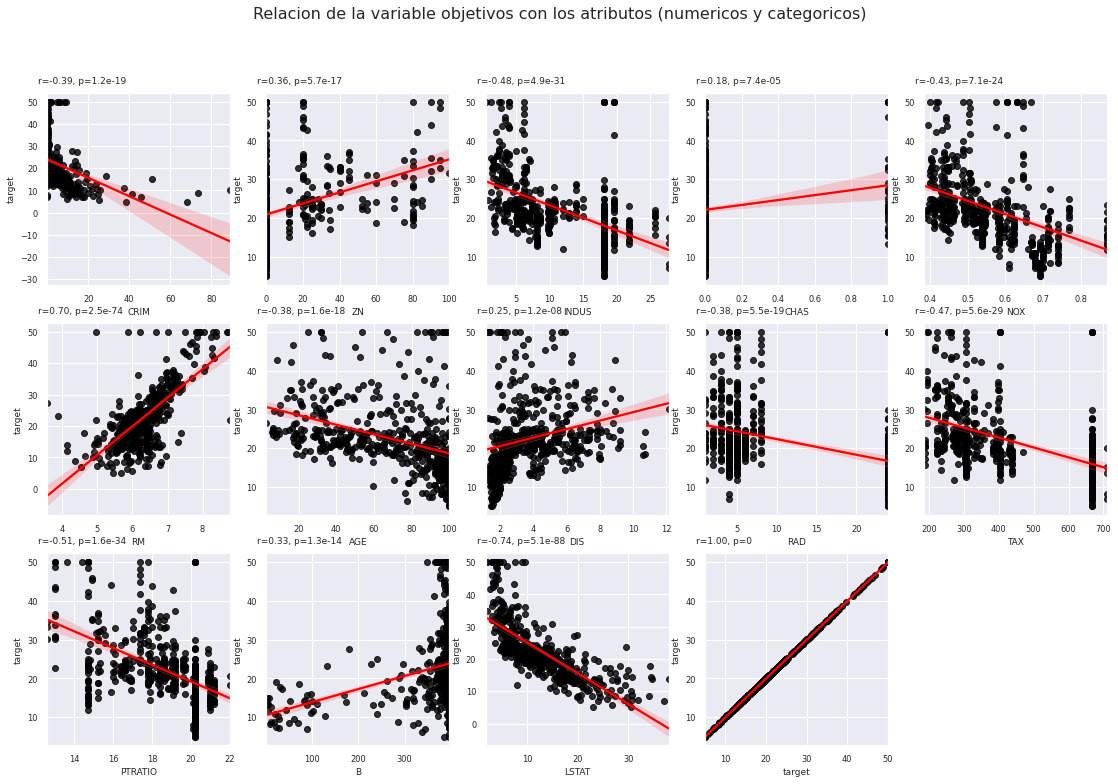

In [111]:
# relacion con la variable objetivo.
if True: # @ comentado 30052022  --FIG_5--
    target_columns= list(df.columns) # pythonic form-.
    nsfigs= len(target_columns) # number of subfigs-.
    nc= 5
    nr= int(np.ceil(nsfigs/nc))
    # print(nr)
    # @ gridspec see Arranging multiple Axes in a Figure Matplotlib doc.-.
    gs= gridspec.GridSpec(nr, nc) 
    fig= plt.figure(figsize=(19,12))
    for idx, col in enumerate(target_columns, start=0):
        ax= fig.add_subplot(gs[idx])
        r, p = st.pearsonr(df['target'],df[col])
        sns.regplot(data= df,
                    x= col,
                    y= 'target',
                    fit_reg= True,
                    scatter_kws={"color": "black"},
                    line_kws={"color": "red"},
                    ax= ax
                    )
        ax.text(-.05, 1.05, 'r={:.2f}, p={:.2g}'.format(r, p),
                transform=ax.transAxes)
        # ax.set_title('{0} en funcion de {1}'.format('target', col)))
        plt.suptitle('Relacion de la variable objetivos con los atributos'+
                     ' (numericos y categoricos)', fontsize=16)


En función del significado y de la correlación que tienen con la variable objetivo (targe/MEDV), se efectúa un análisis a OJO de las variables mas informativas contemplando el significado y la correlación 
(las variables/atributos independientes que presentan o que están correlacionadas no deberían tenerse en cuenta simultáneamente y las que están correlacionadas de forma lineal con la variable objetivo deberían tenerse en cuenta en modelos de RL y/o RLog, en tanto las variables que están correlacionadas de forma no-lineal con la variable objetivo deberían tenerse en cuenta en modelos de regresión no lineales).


* target/MEDV-CRIM: si bien a medida que aumenta la tasa de crimen/per cápita por ciudad/suburbio el precio medio de la casa disminuye, se observa que hasta un valor de CRIM=20 se obtienen múltiples valores de la variable objetivo o target con una tendencia a disminuir a medida que CRIM aumenta. Para valores de CRIM > 20 existen pocos valores sin una tendencia clara, lo cual sugiere que podrían ser OUTLIERS. La relación entre ambas variables es de tipo no-lineal y podría aproximarse a una exponencial. Sumado al sesgo que introduciría en el modelo de AA, esta variable no debería ser tenida en cuenta al momento de aplicar un modelo de AA y/o AP. 

* target/MEDV-ZN: a medida que aumenta la proporción de lotes en zona residencial con superficies mayores a 25000 pies cuadrados el precio medio de la casa presenta una tendencia de aumentar a medida que ZN crece (no tan clara ni definida). Esta variable presenta una gran cantidad y dispersión de datos para ZN=0 y los mayores valores se dan para valores chicos de ZN, ZN=20 y ZN= 80-100. La relación entre ambas variables es de tipo no-lineal y podría aproximarse a una exponencial. Teniendo en cuenta la gran dispersión de valores para INDUS=0,20 y 80-100, la relación entre ambas variables es poco clara y precisa. Variable a contemplar en el modelo.  

* target/MEDV-INDUS: a medida que aumenta la superficie de comercios mayoristas por ciudad/suburbio el precio medio de la casa presenta una tendencia a disminuir (no tan clara ni definida). Esta variable presenta una gran cantidad y dispersión de valores para INDUS menores a 15 y los mayores valores se dan para valores de INDUS menores a 6, 18 y 20 (aproximadamente), lo cual refleja una tendencia poco clara o la presencia de datos atípicos. La relación entre ambas variables es de tipo no-lineal y podría aproximarse a una exponencial. Como se mencionó y debido a una gran cantidad de valores dispersos para INDUS mayores a 15, la relación entre ambas variables es poco clara y precisa. Variable a contemplar en el modelo.  

* target/CHAS: hay más registros de casas que limitan con el Río. En general y a partir de la observación de los conjuntos de puntos para CHAS igual a 0 y a 1,  hay más registros y con mayor dispresión de casas que no limitan con el río. En el caso de las casas que limitan con el río los valores de MEDV están por encima de 10 y tan solo registros tienen una vlor mayor a 32. La tendencia mencionada sugiere que es una variable a contemplar en el modelo de AA.

* target/MEDV-NOX: a medida que aumenta la concentración de Óxido Nítrico por ciudad/suburbio el precio medio de la casa disminuye (no tan marcado, lineal). Hasta NOX igual a 0.65 se presentan los valores máximos de MEDV para varios valores de NOX. Variable a contemplar en el modelo.

* target/MEDV-RM: a medida que aumenta el número promedio de habitaciones por vivienda por ciudad/suburbio el precio medio de la casa aumenta (tendencia y clara y definida). La mayoría de los puntos se encuentran para valores de RM entre 5 y 7, lo cual es un valor alto de habitaciones promedio para una casa. Por otro lado, los valores máximos se dan, en mayor medida, para valores de RM mayores a 8, presentándose solo unos pocos para valores de RM menores, de 5 a 7. La relación entre ambas variables es de tipo lineal. Variable a contemplar en el modelo, principalmente en un modelo lineal.  

* target/MEDV-AGE: a medida que aumenta la proporción de unidades ocupados por sus dueños y construídas antes de 1940 por ciudad/suburbio el precio medio de la casa disminuye (MEDIO/MEDIO, no tan marcado). Sin embargo presenta una gran dispersión, hay múltiples valores de AGE para los cuales MEDV alcanza su valor máximo y finalmente y como se mencionó, hay una falta de uniformidad en la distribución de registros. En principio y dependiendo de los resultados que se obtengan al contemplarla en el modelo de AA; y el carácter binomial de la distribución y lo mencionado (el cual podría deberse a que la variable contempla dos aspectos: i) proporción de unidades ocupados por sus dueños, y ii) construídas antes de 1940 por ciudad/suburbio), la variable podría descartarse y/o no ser tenida en cuenta en el modelo de AA. 

* target/MEDV-DIS: a medida que aumenta la distancia ponderada a 5 centros de empleo en Boston por ciudad/suburbio el precio medio de la casa aumenta o tiende a aumentar. Esta relación, sumada a la distribución no uniforme de los registros (gran cantidad de registros para valores de DIS menores a 4) y la presencia de los valores más altos para DIS menor a 6, dan lugar a pensar, al menos y en principio, de que no debería tenerse en cuenta en el modelo de AA.


* target/MEDV-RAD: si bien a a medida que aumenta el valor del índice de accesibilidad a la carretera radial el valor de MEDV parece diminuir, existe una grn cantidad de registros con una gran dispersión para valores de RAD menores a 9. Posteriormente se presenta una gran cantidad de regsitros para el mayor valor de RAD, i.e., RAD=24 cuyo valor medio es menor que para todos los otros casos. En principio es una variable a contemplar en el modelo de AA.

* target/MEDV-TAX: a medida que aumenta el impuesto a la propiedad de valor total por USD 10000 el valor medio de la propiedad disminuye. Presenta una distribución aproximadamente binomial con un grupo de registros dispersos para valores de TAX menores a 450 y luego otro grupo para dos valores de TAX (aproximdamente 680 y 700). Los valores máximos se encuentran para valores pequeños de TAX, observándose solo un valor máximo par TAX aproximadamente igual a 680, lo cual permite inferir que es un OUTLIER. Los valores mínimos de TAX se presentan en los grupos de registros para TAX aproximadamente 680 y 700. Los registros NOX se presentan de manera parecida a INDUS, NOX y RAD. Es una variable a contemplar en el análisis. 


* target/MEDV-PTRATIO: a medida que la relación alumno/maestro por ciudad aumenta la variable MEDV tiende a aumentar. Si bien la relación no resulta clara y existe una gran dispersión de los registros,  al menos inicialmente es una variable a contemplar en el análisis.



* target/MEDV-B: a medida que aumenta la proporción de negros por ciudad MEDV tiende a aumentar. La myoría de los registros se encuentran corresponden a valores altos de B y presentan una gran dispersión. La variable no debería contemplarse en el análisis debido al análisis hecho como así tampoco por el el sesgo que introduciría en el modelo de AA motiva. 


* target/MEDV-LSTAT: a medida que aumenta el porcentaje de la población de bajo estrato social por ciudad/suburbio el precio medio de la casa disminuye. Es la relación más marcada de las analizadas. La variabilidad/dispersión tiende a aumentar a medida que el valor de LSTAT aumenta. La relación entre ambas variables es de tipo lineal. Si bien y desde el punto de vista contemplado en este punto la variable debería contemplarse en el modelo, principalmente en un modelo lineal; el sesgo que introduciría en el modelo de AA motiva a que esta variable no debería ser tenida en cuenta al momento de aplicar un modelo de AA y/o AP. 

**2.2 Estudie las gráficas, identificando a ojo los atributos que a su criterio sean los más informativos para la predicción.**


**2.3 Para ud., ¿cuáles son esos atributos?. Lístelos en orden de importancia.**

En función del detallado análisis realizado, los atributos se han dividido en tres grupos jerárquicos, esto son:
* Primarios (mayor grado de relevancia): RM, INDUS, ZN, NOX, CHAS y RAD.
* Secundarios (menor grado de relevancia): AGE y PTRATIO.
* Terciarios (a no contemplar): CRIM, LSTAT, DIS y B.

Esta selección solo es aproximada e inicial. Su uso conjunto es función del grado de correlacón que presentan.  Esto puede condicionar el modelo de AA que se aplique y el uso o no de un atributo. Al fin y al cabo, el análisis es un proceso iterativo que dependerá de las métricas obtenidas con los grupos de variables consideradas en cada análisis con un modelo de AA específico.

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

**3-1 Seleccione un solo atributo que considere puede ser el mas apropiado**

In [112]:
# DSs to create a model-.
atrib= df.loc[:,['RM']]; target= df.target
# atrib= atrib.reshape(-1,1)

# split the DS in trainng and test 
X_train , X_test , y_train, y_test = train_test_split(atrib,
                                                      target,
                                                      test_size=0.3, # 30% del data set es usado para test-.
                                                      random_state=0
                                                      )


Visualizamos los conjuntos de puntos de entrenamiento y validacion/test.

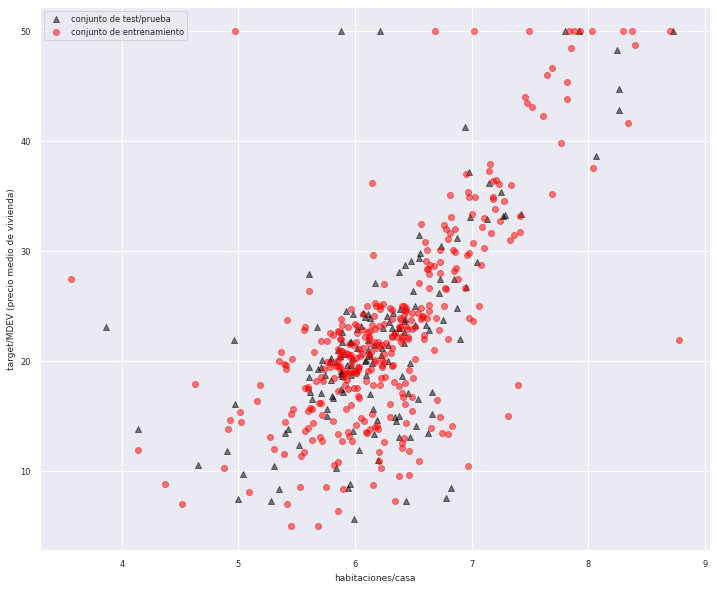

In [113]:
if True:  # --FIG_7-- 
    figure, ax = plt.subplots(figsize=(12, 10))
    ax= plt.scatter(x= X_test.RM,
                    y= y_test,
                    marker='^',
                    color='black',
                    alpha=0.5,
                    label='conjunto de test/prueba'
                    )
    ax= plt.scatter(x= X_train.RM,
                    y= y_train,
                    marker='o',
                    color='red',
                    alpha=0.5,
                    label='conjunto de entrenamiento'
                    )
    plt.legend()
    plt.grid(True)
    plt.xlabel('habitaciones/casa')
    plt.ylabel('target/MDEV (precio medio de vivienda)')


**3.2 Instancie una regresión lineal de scikit-learn, y entrénela usando sólo el atributo seleccionado.**

In [114]:
# RL-.
# create and training the model-.
# modelo ==> instancia de la clase LinearRegression-.
# model= LinearRegression()
model= LinearRegression()

In [115]:
# vemos si estan definidos los coeficientes del modelo de RLsimple-.
# print(model.coef_) # error: the coef_ are created when fit method is called-.

# entrenamos el modelo
model.fit(X_train, y_train)
model_train= model.predict(X_train)
print(model.coef_.round(2))
print(model.intercept_.round(2))

[9.31]
-35.99


**3.3 Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.**

Generamos predicciones (con el conjunto de validación/test)-.

In [116]:
model_test = model.predict(X_test)  

Calculamos los errores de la predicción (val_esperado - val_predicho)-.

In [117]:
def calc_errors(yval:float, yaprox :float):
    r2 = r2_score(yval, yaprox)
    mse= mean_squared_error(yval, yaprox)
    rmse= np.sqrt(mse) # tyo see mse in the same unit that predict value.
    mae= mean_absolute_error(yval, yaprox)
    mevs= explained_variance_score(yval, yaprox)
    me= max_error(yval, yaprox)
    return r2, mse, rmse, mae, mevs, me

In [118]:
# puntaje de regresion de la varianza explicada. best == 1.0, worse == 0-.
r2, mse, rmse, mae, mevs, me= calc_errors(y_train, model_train)

print('{0:<50}{1:>5.2f}'.  
      format('Error absoluto máximo (M)=', me)
      )
print('{0:<50}{1:>5.2f}'.  
      format('Error absoluto medio (MAE)=', mae)
      )
print('{0:<50}{1:>5.2f}'.
      format(r'Coeficiente de determinación (R^{2})', r2)
      )
print('{0:<50}{1:>5.2f}'.  
      format('Error cuadratico medio (MSE)=', mse)
      )
print('{0:<50}{1:>5.2f}{2:>3}'.  
      format('Raíz cuadrada del error cuadrático medio (RMSE)=', rmse, ' (x$1000)')
      )
print('{0:<50}{1:>5.2f}'.  
      format('Varianza explicada o de regresión=',
             mevs
             )
      )

Error absoluto máximo (M)=                        39.72
Error absoluto medio (MAE)=                        4.43
Coeficiente de determinación (R^{2})               0.50
Error cuadratico medio (MSE)=                     42.16
Raíz cuadrada del error cuadrático medio (RMSE)=   6.49 (x$1000)
Varianza explicada o de regresión=                 0.50


In [119]:
# puntaje de regresion de la varianza explicada. best == 1.0, worse == 0-.
r2, mse, rmse, mae, mevs, me= calc_errors(y_test, model_test)

print('{0:<50}{1:>5.2f}'.  
      format('Error absoluto máximo (M)=', me)
      )
print('{0:<50}{1:>5.2f}'.  
      format('Error absoluto medio (MAE)=', mae)
      )
print('{0:<50}{1:>5.2f}'.
      format(r'Coeficiente de determinación (R^{2})', r2)
      )
print('{0:<50}{1:>5.2f}'.  
      format('Error cuadratico medio (MSE)=', mse)
      )
print('{0:<50}{1:>5.2f}{2:>3}'.  
      format('Raíz cuadrada del error cuadrático medio (RMSE)=', rmse, ' (x$1000)')
      )
print('{0:<50}{1:>5.2f}'.  
      format('Varianza explicada o de regresión=',
             mevs
             )
      )

Error absoluto máximo (M)=                        31.29
Error absoluto medio (MAE)=                        4.47
Coeficiente de determinación (R^{2})               0.44
Error cuadratico medio (MSE)=                     47.03
Raíz cuadrada del error cuadrático medio (RMSE)=   6.86 (x$1000)
Varianza explicada o de regresión=                 0.44


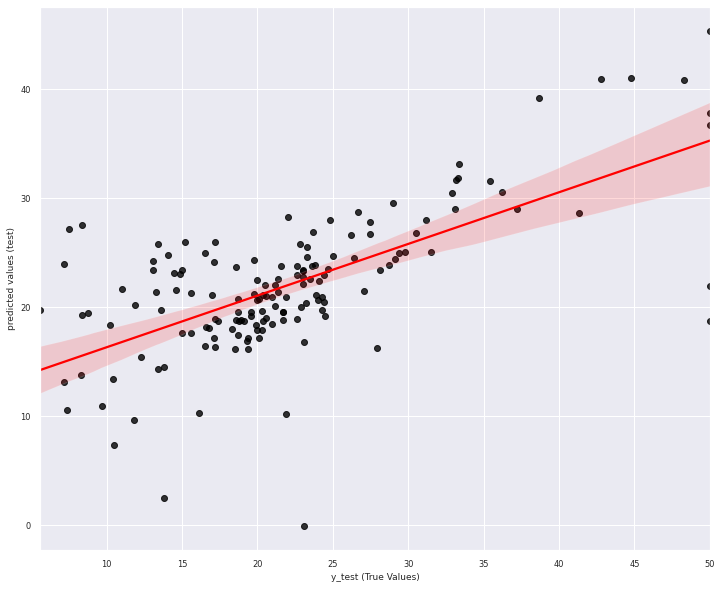

In [120]:
if True:   # --FIG_8-- 
    # fig= plt.figure(figsize=(14,11))
    figure, ax = plt.subplots(figsize=(12, 10))
    # sns.set(rc={'figure.figsize':(10,8)})
    # sns.scatter(y_test,model_test)
    sns.regplot(data= df,
                x= y_test,
                y= model_test,
                fit_reg= True,
                scatter_kws={"color": "black"},
                line_kws={"color": "red"},
                ax= ax
                )
    plt.xlabel('y_test (True Values)')
    plt.ylabel('predicted values (test)')


<Figure size 1008x792 with 0 Axes>

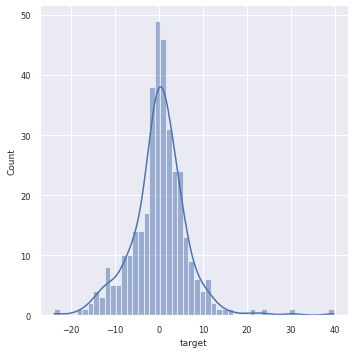

In [121]:
if True:   # --FIG_9-- 
    # distribucion-.
    fig= plt.figure(figsize=(14,11))
    sns.displot(y_train-model_train,
                bins=50,
                kde=True
                )

**3.4 - Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluacion-.**

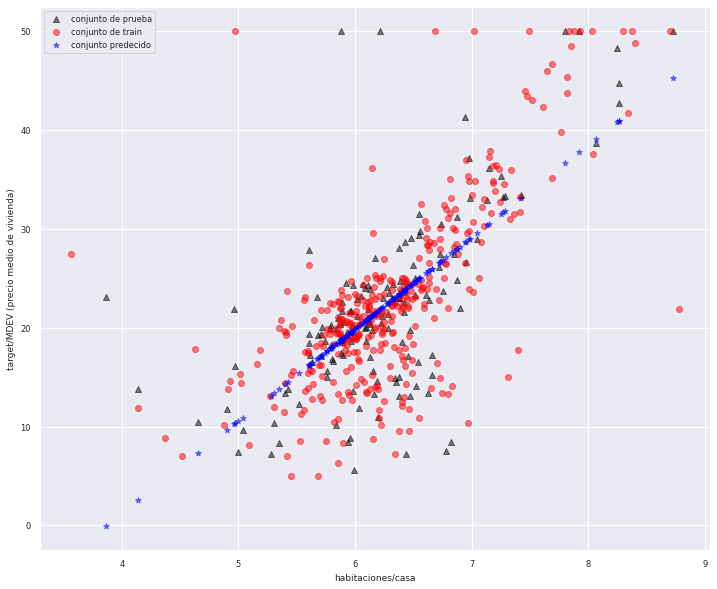

In [122]:
if True: #   # --FIG_10-- 
    figure, ax = plt.subplots(figsize=(12, 10))
    ax= plt.scatter(x= X_test.RM,
                    y= y_test,
                    marker='^',
                    color='black',
                    alpha=0.5,
                    label='conjunto de prueba'
                    )
    ax= plt.scatter(x= X_train.RM,
                    y= y_train,
                    marker='o',
                    color='red',
                    alpha=0.5,
                    label='conjunto de train'
                    )
    ax= plt.scatter(x= X_test.RM,
                    y= model_test,
                    marker='*',
                    color='blue',
                    alpha=0.5,
                    label='conjunto predecido'
                    )
    plt.legend()
    plt.grid(True)
    plt.xlabel('habitaciones/casa')
    plt.ylabel('target/MDEV (precio medio de vivienda)')

<Figure size 1008x792 with 0 Axes>

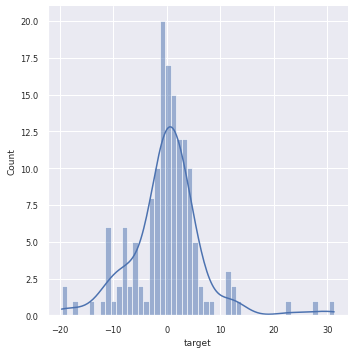

In [123]:
if True: # --FIG_11-- 
    fig= plt.figure(figsize=(14,11))
    sns.displot(y_test-model_test,
                bins=50,
                kde=True
                )

**3.5 Interprete el resultado, haciendo algun comentario sobre  las cualidades del modelo obtenido.**

* El error aboluto medio (MAE) es igual a 4.43 y 4.47 para las predicciones de los conjuntos de datos de entrenamiento y test respectivamente. Claramente los valores de esta métrica para ambos conjuntos de datos es aproximadamente igual.
* El error cuadrático medio (MSE) es igual a 42.16  y 47.03 para las predicciones de los conjuntos de datos de entrenamiento y test respectivamente. Al analizar los valores se observa que, al igual que para la métrica MAE, el error promedio de las mediciones  prácticamente no difere entre ambos conjuntos de datos (esto sugiere que los errores grandes presentes en el conjunto de entrenamiento y test son semejantes).
* Lo mencionado al final del ítem precedente, se ve reflejado al observar los valores del error absoluto máximo en ambos conjuntos de datos: 39.72 y 31.29 para el conjunto de entrenamiento y prueba o test respectivamente.
* Por otro lado y con el fin de interpretar el MSE en términos de las unidades de la variable target o predicha, se calculó la raiz cuadrada del error cuadrático medio (RMSE), resultando 6490 USD y 6860 USD para la predicción de los datos de entrenamiento y test respectivamente. 
* Finalmente se presentan los valores del coeficiente de determinación para ambos conjuntos de datos, siendo 0.5 y 0.44 par los conjuntos de entrenamiento y de test predichos respectivamente. Claramente el ajuste del modelo lineal resulta un poco más preciso para el conjunto de entrenamiento que para el de testeo. En el caso del conjunto de entrenamiento el modelo lineal capta un 50% de la variación de la variable objetivo o target, en tanto en el conjunto de test lo hace en un 44%.


A partir del análisis realizado, puede decirse que la regresión lineal es un buen modelo del conjunto de datos de entrenamiento y de test. Esto se observa en la gráfica de la recta de regresión junto a los conjuntos de datos de entrenamiento y test. De los análisis previos, se deduce que los bajos valores de las métricas contempladas en este análisis, se deben, principalmente, a los valores atípicos/outliers o en su defecto a valores inesperados que debemos contemplar y que dan lugar a los valores calculados. Lo mencionado se observa en las gráficas de las distribuciones de los errores o residuos de ambos conjuntos de datos, claramente, la distribución de errores o residuos para los conjuntos de entrenamiento y test presenta una cola hacia la derecha. 

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

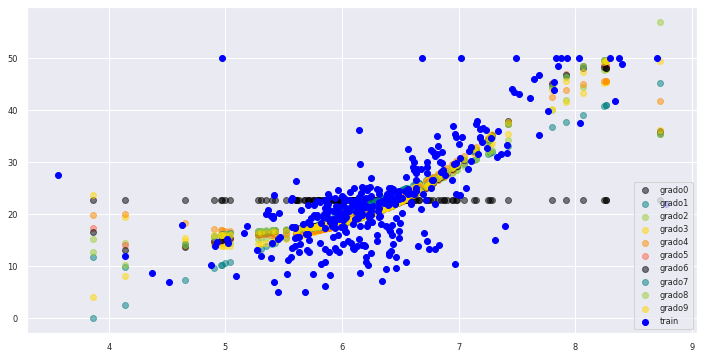

In [124]:
train_errors = []
val_errors = []
if True: # @ comentado 30052022 --FIG_12--
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_prop_cycle(color=["black",    # incompleto (tbc in f(poliegrees)
                             "teal",
                             "yellowgreen",
                             "gold",
                             "darkorange",
                             "tomato"
                             ]
                      )

# 4-1-A- Instancie y entrene una regresion polinomial.
# grados de los polinomios empleados en la RPol-.
# 4-1-B- Prediga y calcule error en entrenamiento y evaluacion.
#        Imprima los valores.
# 4-1-C- Guarde los errores en una lista.
pol_degree= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in pol_degree:
    # entrenamiento-.
    pf= PolynomialFeatures(degree=degree)
    lr = LinearRegression()
    model = make_pipeline(pf, lr)
    model.fit(X_train, y_train)
    # predicciones-.
    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)
    # store errors-.
    # train_errors.append(mean_squared_error(y_train, y_train_pred)
    #                    )
    # val_errors.append(mean_squared_error(y_test, y_test_pred)
    #                  )
    r2, mse, rmse, mae, mevs, me= calc_errors(y_train, y_train_pred)
    val_to_add= [r2, mse, mae, mevs, rmse, me]
    train_errors= train_errors + val_to_add
    r2, mse, rmse, mae, mevs, me= calc_errors(y_test, y_test_pred)
    val_to_add= [r2, mse, mae, mevs, rmse, me]
    val_errors= val_errors + val_to_add
    
    # grafico-.
    if True: # --FIG_13 and others-- 
        ax.scatter(X_test.RM,
                   y_test_pred,
                   label=f'grado{degree}',
                   alpha=0.5
                   )
        ax.grid(True)
if True: # --FIG_13 and others-- 
    ax.scatter(X_train, y_train, color="blue", label="train")
    ax.legend(loc=4) # lower right
# ax.set_ylim([-75, 75]) # grafico recortado, para visualizar todo -outliers- comentar esta linea y correr-.

In [125]:
def print_errors(tr_err, test_err):
    # r2, mse, rmse, mae, mevs, me
    # imprimo los valores de los errores (mse==> error medio cuadratico)
    print('{0}{1}{2}'.format('\n', '\3\t', 'ERRORES DE ENTRENAMIENTO'))
    print('{0:<10}{1}{2}'.
          format('R2', ':', list(np.around(np.array(
              tr_err[0:len(tr_err):6]),2)))) # R2
    print('{0:<10}{1}{2}'.
          format('MSE', ':', list(np.around(np.array(
              tr_err[1:len(tr_err):6]),2)))) # mse
    print('{0:<10}{1}{2}'.
          format('MAE', ':', list(np.around(np.array(
              tr_err[2:len(tr_err):6]),2)))) # mae
    print('{0:<10}{1}{2}'.
          format('MEVS', ':', list(np.around(np.array(
              tr_err[3:len(tr_err):6]),2)))) # mevs
    print('{0:<10}{1}{2}'.
          format('RMSE', ':', list(np.around(np.array(
              tr_err[4:len(tr_err):6]),2)))) # rmse
    print('{0:<10}{1}{2}'.
          format('ME', ':', list(np.around(np.array(
              tr_err[5:len(tr_err):6]),2)))) # me
    
    print('{0}{1}{2}'.format('\n', '\3\t', 'ERRORES DE TEST'))
    print('{0:<10}{1}{2}'.
          format('R2', ':', list(np.around(np.array(
              test_err[0:len(test_err):6]),2)))) # r2
    print('{0:<10}{1}{2}'.
          format('MSE', ':', list(np.around(np.array(
              test_err[1:len(test_err):6]),2)))) # mse
    print('{0:<10}{1}{2}'.
          format('MAE', ':', list(np.around(np.array(
              test_err[2:len(test_err):6]),2)))) # mae
    print('{0:<10}{1}{2}'.
          format('MEVS', ':', list(np.around(np.array(
              test_err[3:len(test_err):6]),2)))) # mevs
    print('{0:<10}{1}{2}'.
          format('RMSE', ':', list(np.around(np.array(
              test_err[4:len(test_err):6]),2)))) # rmse
    print('{0:<10}{1}{2}'.
          format('ME', ':', list(np.around(np.array(
              test_err[5:len(test_err):6]),2)))) # me

In [126]:
print_errors(train_errors, val_errors)


	ERRORES DE ENTRENAMIENTO
R2        :[0.0, 0.5, 0.56, 0.58, 0.6, 0.62, 0.62, 0.63, 0.63, 0.63]
MSE       :[84.76, 42.16, 36.95, 35.32, 33.54, 31.93, 31.91, 31.74, 31.73, 31.63]
MAE       :[6.72, 4.43, 4.17, 4.14, 4.15, 3.99, 3.99, 4.0, 3.99, 3.99]
MEVS      :[0.0, 0.5, 0.56, 0.58, 0.6, 0.62, 0.62, 0.63, 0.63, 0.63]
RMSE      :[9.21, 6.49, 6.08, 5.94, 5.79, 5.65, 5.65, 5.63, 5.63, 5.62]
ME        :[27.25, 39.72, 36.16, 36.02, 33.04, 35.04, 34.94, 33.88, 34.0, 33.98]

	ERRORES DE TEST
R2        :[-0.01, 0.44, 0.51, 0.5, 0.49, 0.5, 0.5, 0.48, 0.48, 0.47]
MSE       :[83.77, 47.03, 40.87, 41.22, 42.42, 41.24, 41.24, 43.09, 42.92, 44.1]
MAE       :[6.62, 4.47, 4.32, 4.33, 4.55, 4.41, 4.42, 4.57, 4.56, 4.59]
MEVS      :[0.0, 0.44, 0.51, 0.5, 0.49, 0.5, 0.51, 0.48, 0.48, 0.47]
RMSE      :[9.15, 6.86, 6.39, 6.42, 6.51, 6.42, 6.42, 6.56, 6.55, 6.64]
ME        :[27.25, 31.29, 31.75, 32.46, 32.67, 31.9, 31.9, 32.16, 32.15, 31.96]


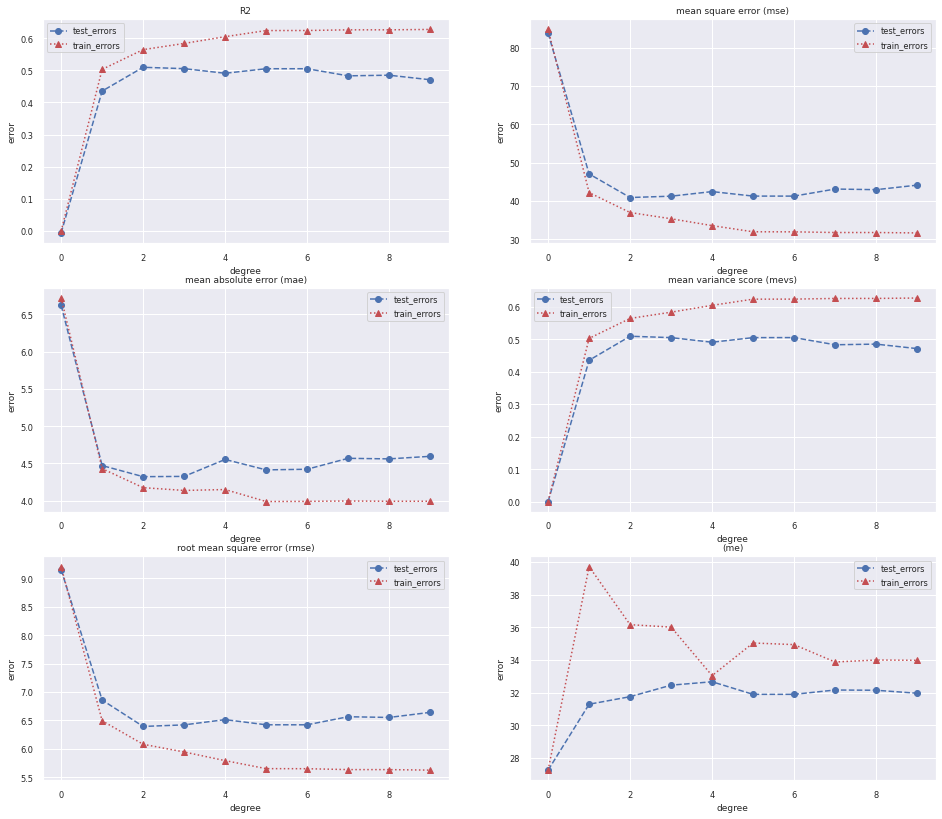

In [127]:
# 4-2- Grafique las curvas de error en terminos del grado del
#      polinomio.
if True: # @ comentado 30052022  # --FIG_14-- 
    # print(len(val_errors))
    target_columns= len(val_errors)/len(pol_degree) # pythonic form-.
    nsfigs= target_columns # number of subfigs-.
    nc= 2
    nr= int(np.ceil(nsfigs/nc))
    # @ gridspec see Arranging multiple Axes in a Figure Matplotlib doc.-.
    gs= gridspec.GridSpec(nr, nc) 
    fig= plt.figure(figsize=(16,14))
    for idx in range(int(nsfigs)):
        # type of errors
        if idx == 0: type_error= 'R2'
        elif idx == 1: type_error= 'mean square error (mse)'
        elif idx == 2: type_error= 'mean absolute error (mae)'
        elif idx == 3: type_error= 'mean variance score (mevs)'
        elif idx == 4: type_error= 'root mean square error (rmse)'
        elif idx == 5: type_error= '(me)'
        else:
            print('Error type not contemplated (0-5)')
            exit
        ax= fig.add_subplot(gs[idx])
        #print(plot_degree)
        #print(val_errors[0+idx:len(val_errors):4])
        ax.plot(pol_degree,
                val_errors[0+idx:len(val_errors):6],
                linestyle='--',
                marker='o',
                color='b',
                label='test_errors'
                )
        ax.plot(pol_degree,
                train_errors[0+idx:len(val_errors):6],
                linestyle=':',
                marker='^',
                color='r',
                label='train_errors'
                )
        plt.title('{0}'.format(type_error))
        ax.legend()
        ax.set_xlabel("degree")
        ax.set_ylabel("error")
        ax.grid(True)


Al analizar las curvas se observa que el overfitting comienza a partir del  grado 2 del polinomio-.

Al analizar la evolución y la diferencia del error medio cuadrático entre el conjunto de entrenamiento y de validación/test, se concluye que el mejor modelo corresponde a la RPol de grado 2. A continuación se grafican el modelo con el conjunto de datos.


$\textbf{NOTA}$

Si bien podría considerarse un polinomio de mayor grado, 3 (tres), del análisis de las curvas de los errores y contemplando el principio de la Navaja de Occam (Occam's razor), según el cual un modelo de AA/AP simple es preferible, se selecciona el polinomio de grado 2 y se analizará si es o no mejor que la regresión lineal a través de la compración con las métricas halladas con el modelo de regresión lineal.

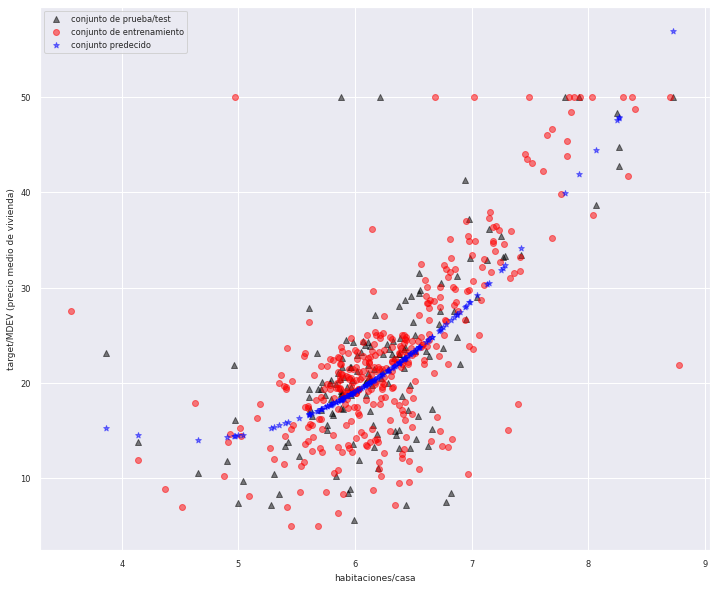

In [128]:
# 3-4 - Grafique el modelo resultante, junto con los puntos de
#       entrenamiento y evaluacion-.

pol_degree_best= 2
# entrenamiento-.
pf= PolynomialFeatures(degree=pol_degree_best)
lr = LinearRegression()
model = make_pipeline(pf, lr)
model.fit(X_train, y_train)
# predicciones-.
y_test_pred= model.predict(X_test)
# graficamos-.
if True: # --FIG_15-- 
    figure, ax = plt.subplots(figsize=(12, 10))
    ax= plt.scatter(x= X_test.RM,
                    y= y_test,
                    marker='^',
                    color='black',
                    alpha=0.5,
                    label='conjunto de prueba/test'
                    )
    ax= plt.scatter(x= X_train.RM,
                    y= y_train,
                    marker='o',
                    color='red',
                    alpha=0.5,
                    label='conjunto de entrenamiento'
                    )
    ax= plt.scatter(x= X_test.RM,
                    y= y_test_pred,
                    marker='*',
                    color='blue',
                    alpha=0.5,
                    label='conjunto predecido'
                    )

    plt.legend()
    plt.grid(True)
    plt.xlabel('habitaciones/casa')
    plt.ylabel('target/MDEV (precio medio de vivienda)')

Interprete el resultado, haciendo algun comentario sobre las cualidades del modelo obtenido.

In [129]:
# r2, mse, rmse, mae, mevs, me
# errores de entrenamiento para la regresion polinomica de grado 2
# (gradoCero[0-5], gradoUno[6-11], gradoDos[12-17])
print('{0}{1}{2}'.format('\n', '\3\t', 'ERRORES DE ENTRENAMIENTO'))
print('{0:<10}{1}{2:.2f}'.format('R2', ':', train_errors[12]))
print('{0:<10}{1}{2:.2f}'.format('MSE', ':', train_errors[13]))
print('{0:<10}{1}{2:.2f}'.format('MAE', ':', train_errors[14]))
print('{0:<10}{1}{2:.2f}'.format('MEVS', ':', train_errors[15]))
print('{0:<10}{1}{2:.2f}'.format('RMSE', ':', train_errors[16]))
print('{0:<10}{1}{2:.2f}'.format('ME', ':', train_errors[17]))

# r2, mse, rmse, mae, mevs, me
# errores de test para la regresion polinomica de grado 3
print('{0}{1}{2}'.format('\n', '\3\t', 'ERRORES DE TEST'))
print('{0:<10}{1}{2:.2f}'.format('R2', ':', val_errors[12]))
print('{0:<10}{1}{2:.2f}'.format('MSE', ':', val_errors[13]))
print('{0:<10}{1}{2:.2f}'.format('MAE', ':', val_errors[14]))
print('{0:<10}{1}{2:.2f}'.format('MEVS', ':', val_errors[15]))
print('{0:<10}{1}{2:.2f}'.format('RMSE', ':', val_errors[16]))
print('{0:<10}{1}{2:.2f}'.format('ME', ':', val_errors[17]))


	ERRORES DE ENTRENAMIENTO
R2        :0.56
MSE       :36.95
MAE       :4.17
MEVS      :0.56
RMSE      :6.08
ME        :36.16

	ERRORES DE TEST
R2        :0.51
MSE       :40.87
MAE       :4.32
MEVS      :0.51
RMSE      :6.39
ME        :31.75


Contemplando las métricas MSE, RMSE y R2, se observa que las tres mejoran respecto al modelo de regresión lineal (MSE y RMSE disminuyeron y R2 aumentó) para los dos conjuntos de datos predichos. La mejora se observa en las métricas de las medidas de error en las mediciones como en la medida promedio de los errores en los valores predichos por el modelo de regresión polinomial respecto al modelo de regresión lineal. Por último, el incremento en los valores de R2 en los conjuntos de entrenamiento y test, refleja  que el modelo de regresión polinomial ajusta mejor a los conjuntos de datos.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

En función del análisis realizado en el Punto 2.3, se seleccionaron las variables/atributos:
1. RM-.
2. CRIM-.
3. TAX-.


para desarrollar este punto-.

In [131]:
# hago otra aproximacion para (not used here)-.
vars_to_delete = ['ZN', 'CHAS', 'RAD', 'TAX',
                  'AGE', 'PTRATIO',
                  'CRIM', 'DIS', 'B', 'LSTAT', ]
df_multicol= df.drop(vars_to_delete, axis=1) # (not used here)-.

In [132]:
# DSs to create a model-.
# atrib= df.loc[:,['RM', 'CRIM', 'RAD']]; target= df.target
atrib= df[['RM', 'INDUS', 'NOX']]; target= df.target

In [133]:
# split the DS in trainng and test 
X_train , X_test , y_train, y_test = train_test_split(atrib,
                                                      target,
                                                      test_size=0.3,
                                                      random_state=0 # seed
                                                      )

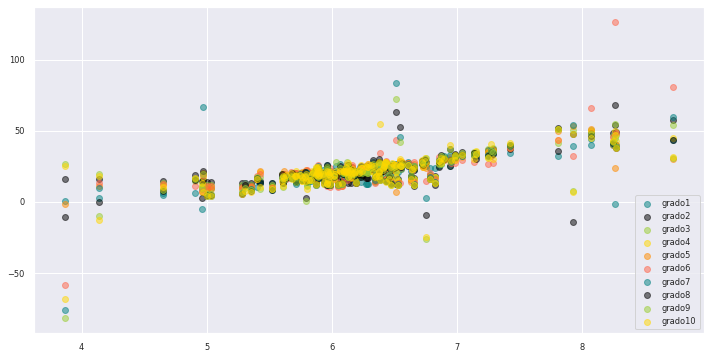

In [134]:
train_errors = [] # list to save training errors in function of polynomial degree-.
val_errors = [] # list to save tests errors in function of polynomial degree-.

if True: # @ comentado 30052022 --FIG_16--
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_prop_cycle(color=["teal",        # incompleto (tbc in f(poliegrees)
                             "black",
                             "yellowgreen",
                             "gold",
                             "darkorange",
                             "tomato"
                             ]
                      )

pol_degree= [1,2,3,4,5,6,7,8,9,10]
#pol_degree= [3]
for degree in pol_degree:
    # entrenamiento-.
    pf= PolynomialFeatures(degree=degree, include_bias=True)
    
    X_train_poly = pf.fit_transform(X_train)
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)

    # predicting on training data-set-.
    y_train_pred= lr.predict(X_train_poly)
    
    # predicting on test data-set-.
    y_test_pred= lr.predict(pf.fit_transform(X_test))
    
    # store errors-.
    r2, mse, rmse, mae, mevs, me= calc_errors(y_train, y_train_pred)
    val_to_add= [r2, mse, mae, mevs, rmse, me]
    train_errors= train_errors + val_to_add
    r2, mse, rmse, mae, mevs, me= calc_errors(y_test, y_test_pred)
    val_to_add= [r2, mse, mae, mevs, rmse, me]
    val_errors= val_errors + val_to_add
     
    # grafico-.
    if True: # @ comentado 30052022 --FIG_17--
        ax.scatter(X_test.RM,
                   y_test_pred,
                   label=f'grado{degree}',
                   alpha=0.5
                   )
        ax.grid(True)
        # ax.scatter(X_train.RM, y_train, color="blue", label="train")
        ax.legend(loc=4) # lower right
# ax.set_ylim([-75, 75]) # grafico recortado, para visualizar todo comentar esta linea y correr-.

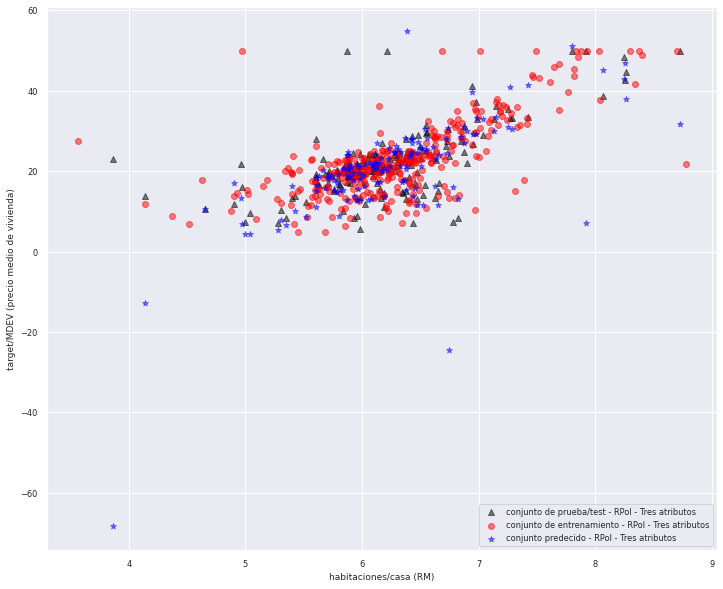

In [135]:
# (viene de 3-4) - Grafique el modelo resultante, junto con los puntos de
# entrenamiento y evaluacion-.
if True: # --FIG_18--
    figure, ax = plt.subplots(figsize=(12, 10))
    ax= plt.scatter(x= X_test.RM,
                    y= y_test,
                    marker='^',
                    color='black',
                    alpha=0.5,
                    label='conjunto de prueba/test - RPol - Tres atributos'
                    )
    ax= plt.scatter(x= X_train.RM,
                    y= y_train,
                    marker='o',
                    color='red',
                    alpha=0.5,
                    label='conjunto de entrenamiento - RPol - Tres atributos'
                    )
    ax= plt.scatter(x= X_test.RM,
                    y= y_test_pred,
                    marker='*',
                    color='blue',
                    alpha=0.5,
                    label='conjunto predecido - RPol - Tres atributos'
                )
    plt.legend()
    plt.grid(True)
    plt.xlabel('habitaciones/casa (RM)')
    plt.ylabel('target/MDEV (precio medio de vivienda)')
    

In [136]:
print_errors(train_errors, val_errors)


	ERRORES DE ENTRENAMIENTO
R2        :[0.57, 0.71, 0.75, 0.79, 0.82, 0.73, 0.87, 0.88, 0.89, 0.87]
MSE       :[36.4, 24.61, 21.03, 18.09, 14.97, 22.61, 10.93, 10.16, 9.25, 11.11]
MAE       :[4.18, 3.31, 3.02, 2.82, 2.54, 3.45, 2.28, 2.19, 2.1, 2.45]
MEVS      :[0.57, 0.71, 0.75, 0.79, 0.82, 0.73, 0.87, 0.88, 0.89, 0.87]
RMSE      :[6.03, 4.96, 4.59, 4.25, 3.87, 4.75, 3.31, 3.19, 3.04, 3.33]
ME        :[40.25, 36.78, 34.58, 33.21, 26.75, 23.81, 21.8, 20.0, 18.38, 20.4]

	ERRORES DE TEST
R2        :[0.48, 0.56, 0.58, 0.57, 0.47, -0.71, -1.02, -0.23, -0.96, -0.56]
MSE       :[43.56, 36.89, 34.81, 35.59, 43.79, 142.7, 167.87, 102.3, 163.04, 130.21]
MAE       :[4.31, 3.94, 3.79, 3.71, 4.07, 5.55, 6.06, 5.36, 5.77, 5.6]
MEVS      :[0.48, 0.56, 0.58, 0.57, 0.48, -0.71, -1.01, -0.22, -0.94, -0.54]
RMSE      :[6.6, 6.07, 5.9, 5.97, 6.62, 11.95, 12.96, 10.11, 12.77, 11.41]
ME        :[33.43, 35.42, 35.83, 37.14, 35.41, 83.62, 99.21, 64.46, 105.03, 91.24]


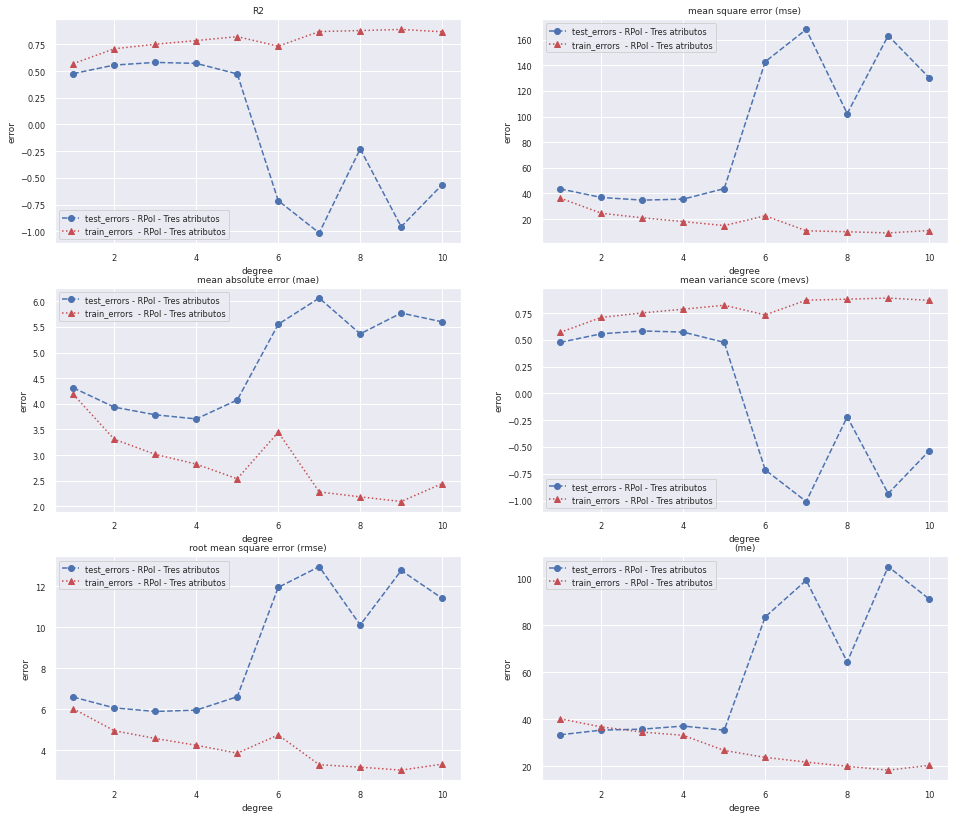

In [137]:
# (viene de 4-2-) Grafique las curvas de error en terminos del grado del
#                 polinomio-.
if True: # @ comentado 30052022 # --FIG_19--
    # print(len(val_errors))
    target_columns= len(val_errors)/len(pol_degree) # pythonic form-.
    nsfigs= target_columns # number of subfigs-.
    nc= 2
    nr= int(np.ceil(nsfigs/nc))
    # @ gridspec see Arranging multiple Axes in a Figure Matplotlib doc.-.
    gs= gridspec.GridSpec(nr, nc) 
    fig= plt.figure(figsize=(16,14))
    for idx in range(int(nsfigs)):
        # type of errors
        if idx == 0: type_error= 'R2'
        elif idx == 1: type_error= 'mean square error (mse)'
        elif idx == 2: type_error= 'mean absolute error (mae)'
        elif idx == 3: type_error= 'mean variance score (mevs)'
        elif idx == 4: type_error= 'root mean square error (rmse)'
        elif idx == 5: type_error= '(me)'
        else:
            print('Error type not contemplated (0-5)')
            exit
        ax= fig.add_subplot(gs[idx])
        ax.plot(pol_degree,
                val_errors[0+idx:len(val_errors):6],
                linestyle='--',
                marker='o',
                color='b',
                label='test_errors - RPol - Tres atributos'
                )
        ax.plot(pol_degree,
                train_errors[0+idx:len(val_errors):6],
                linestyle=':',
                marker='^',
                color='r',
                label='train_errors  - RPol - Tres atributos'
                )
        plt.title('{0}'.format(type_error))
        ax.legend()
        ax.set_xlabel("degree")
        ax.set_ylabel("error")
        ax.grid(True)

In [138]:
# r2, mse, rmse, mae, mevs, me
# errores de entrenamiento para la regresion polinomica de grado 2
# (gradoCero[0-5], gradoUno[6-11], gradoDos[12-17])
print('{0}{1}{2}'.format('\n', '\3\t', 'ERRORES DE ENTRENAMIENTO'))
print('{0:<10}{1}{2:.2f}'.format('R2', ':', train_errors[6]))
print('{0:<10}{1}{2:.2f}'.format('MSE', ':', train_errors[7]))
print('{0:<10}{1}{2:.2f}'.format('MAE', ':', train_errors[8]))
print('{0:<10}{1}{2:.2f}'.format('MEVS', ':', train_errors[9]))
print('{0:<10}{1}{2:.2f}'.format('RMSE', ':', train_errors[10]))
print('{0:<10}{1}{2:.2f}'.format('ME', ':', train_errors[11]))

# r2, mse, rmse, mae, mevs, me
# errores de test para la regresion polinomica de grado 2
print('{0}{1}{2}'.format('\n', '\3\t', 'ERRORES DE TEST'))
print('{0:<10}{1}{2:.2f}'.format('R2', ':', val_errors[6]))
print('{0:<10}{1}{2:.2f}'.format('MSE', ':', val_errors[7]))
print('{0:<10}{1}{2:.2f}'.format('MAE', ':', val_errors[8]))
print('{0:<10}{1}{2:.2f}'.format('MEVS', ':', val_errors[9]))
print('{0:<10}{1}{2:.2f}'.format('RMSE', ':', val_errors[10]))
print('{0:<10}{1}{2:.2f}'.format('ME', ':', val_errors[11]))


	ERRORES DE ENTRENAMIENTO
R2        :0.71
MSE       :24.61
MAE       :3.31
MEVS      :0.71
RMSE      :4.96
ME        :36.78

	ERRORES DE TEST
R2        :0.56
MSE       :36.89
MAE       :3.94
MEVS      :0.56
RMSE      :6.07
ME        :35.42


Contemplando las métricas MSE, RMSE y R2, se observa que las tres mejoran respecto al modelo de regresión lineal y polinomial con un atributo o variable (MSE y RMSE disminuyeron y R2 aumentó) para los dos conjuntos de datos predichos. La mejora se observa en las métricas de las medidas de error en las mediciones como en la medida promedio de los errores en los valores predichos por el modelo de regresión polinomial con tres features o aributos respecto al modelo de regresión lineal y/o polinomial con un atributo o feature. Por último, el incremento en los valores de R2 en los conjuntos de entrenamiento y test, refleja  que el modelo de regresión polinomial ajusta mejor a los conjuntos de datos.

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

In [175]:
# DSs to create a model-.
# atrib= df.loc[:,['RM', 'CRIM', 'RAD']]; target= df.target
# X= df[['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'AGE', 'PTRATIO']]; y= df.target

X = df.drop(columns="target")
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0
                                                    )
print(df.shape)
print(df.columns)
print(X.shape)
print(y.shape)

(506, 14)
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')
(506, 13)
(506,)


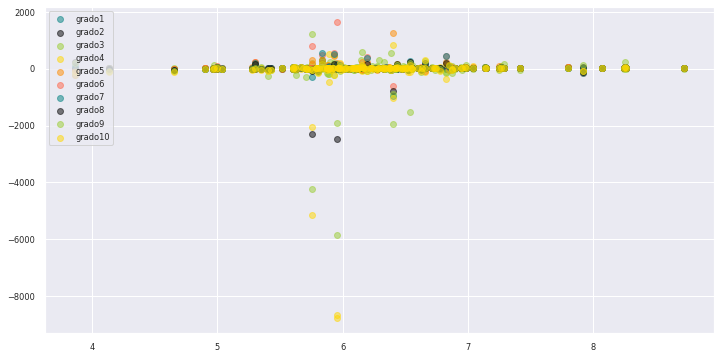

In [176]:
train_errors = [] # list to save training errors in function of polynomial degree-.
val_errors = [] # list to save tests errors in function of polynomial degree-.

if True: # @ comentado 30052022 --FIG_16--
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_prop_cycle(color=["teal",        # incompleto (tbc in f(poliegrees)
                             "black",
                             "yellowgreen",
                             "gold",
                             "darkorange",
                             "tomato"
                             ]
                      )


# pol_degree= [2] # es trivial-.
pol_degree= [1,2,3,4,5,6,7,8,9,10]
for degree in pol_degree:
    # entrenamiento-.
    pf= PolynomialFeatures(degree=degree, include_bias=True)
    
    X_train_poly = pf.fit_transform(X_train)
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)

    # predicting on training data-set-.
    y_train_pred= lr.predict(X_train_poly)
    
    # predicting on test data-set-.
    y_test_pred= lr.predict(pf.fit_transform(X_test))
    
    # store errors-.
    r2, mse, rmse, mae, mevs, me= calc_errors(y_train, y_train_pred)
    val_to_add= [r2, mse, mae, mevs, rmse, me]
    train_errors= train_errors + val_to_add
    r2, mse, rmse, mae, mevs, me= calc_errors(y_test, y_test_pred)
    val_to_add= [r2, mse, mae, mevs, rmse, me]
    val_errors= val_errors + val_to_add
    
    # grafico-.
    ax.scatter(X_test.RM,
               y_test_pred,
               label=f'grado{degree}',
               alpha=0.5
               )
    ax.grid(True)
    # ax.scatter(X_train.RM, y_train, color="blue", label="train")
    ax.legend(loc="upper left")

Text(0, 0.5, 'target/MDEV (precio medio de vivienda)')

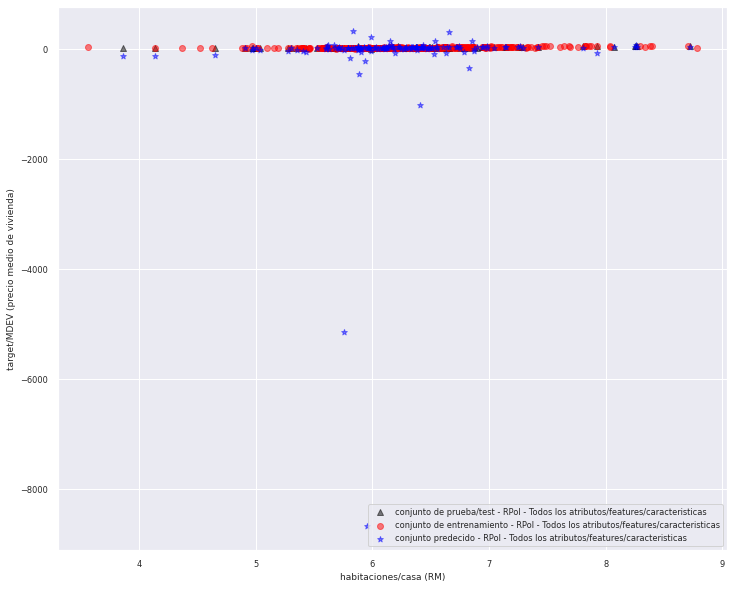

In [177]:
# (viene de 3-4) - Grafique el modelo resultante, junto con los puntos de
# entrenamiento y evaluacion-.
figure, ax = plt.subplots(figsize=(12, 10))
ax= plt.scatter(x= X_test.RM,
                y= y_test,
                marker='^',
                color='black',
                alpha=0.5,
                label='conjunto de prueba/test - RPol - Todos los atributos/features/caracteristicas'
                )
ax= plt.scatter(x= X_train.RM,
                y= y_train,
                marker='o',
                color='red',
                alpha=0.5,
                label='conjunto de entrenamiento - RPol - Todos los atributos/features/caracteristicas'
                )
ax= plt.scatter(x= X_test.RM,
                y= y_test_pred,
                marker='*',
                color='blue',
                alpha=0.5,
                label='conjunto predecido - RPol - Todos los atributos/features/caracteristicas'
                )
plt.legend()
plt.grid(True)
plt.xlabel('habitaciones/casa (RM)')
plt.ylabel('target/MDEV (precio medio de vivienda)') # en funcion de un atributo/feature/caractersitica-.

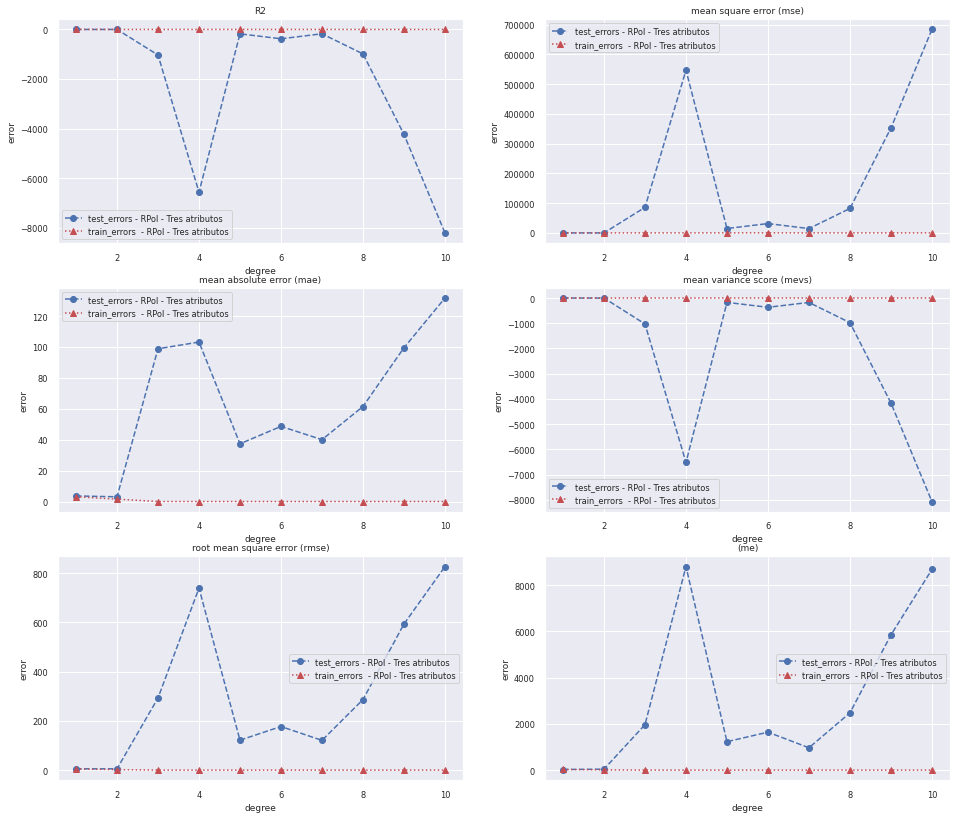

In [178]:
# (viene de 4-2-) Grafique las curvas de error en terminos del grado del
#                 polinomio-.
if True: # @ comentado 30052022 # --FIG_19--
    # print(len(val_errors))
    target_columns= len(val_errors)/len(pol_degree) # pythonic form-.
    nsfigs= target_columns # number of subfigs-.
    nc= 2
    nr= int(np.ceil(nsfigs/nc))
    # @ gridspec see Arranging multiple Axes in a Figure Matplotlib doc.-.
    gs= gridspec.GridSpec(nr, nc) 
    fig= plt.figure(figsize=(16,14))
    for idx in range(int(nsfigs)):
        # type of errors
        if idx == 0: type_error= 'R2'
        elif idx == 1: type_error= 'mean square error (mse)'
        elif idx == 2: type_error= 'mean absolute error (mae)'
        elif idx == 3: type_error= 'mean variance score (mevs)'
        elif idx == 4: type_error= 'root mean square error (rmse)'
        elif idx == 5: type_error= '(me)'
        else:
            print('Error type not contemplated (0-5)')
            exit
        ax= fig.add_subplot(gs[idx])
        ax.plot(pol_degree,
                val_errors[0+idx:len(val_errors):6],
                linestyle='--',
                marker='o',
                color='b',
                label='test_errors - RPol - Tres atributos'
                )
        ax.plot(pol_degree,
                train_errors[0+idx:len(val_errors):6],
                linestyle=':',
                marker='^',
                color='r',
                label='train_errors  - RPol - Tres atributos'
                )
        plt.title('{0}'.format(type_error))
        ax.legend()
        ax.set_xlabel("degree")
        ax.set_ylabel("error")
        ax.grid(True)

In [179]:
# r2, mse, rmse, mae, mevs, me
# errores de entrenamiento para la regresion polinomica de grado 1
# (gradoCero[0-5], gradoUno[6-11], gradoDos[12-17])
print('{0}{1}{2}'.format('\n', '\3\t', 'ERRORES DE ENTRENAMIENTO'))
print('{0:<10}{1}{2:.2f}'.format('R2', ':', train_errors[6]))
print('{0:<10}{1}{2:.2f}'.format('MSE', ':', train_errors[7]))
print('{0:<10}{1}{2:.2f}'.format('MAE', ':', train_errors[8]))
print('{0:<10}{1}{2:.2f}'.format('MEVS', ':', train_errors[9]))
print('{0:<10}{1}{2:.2f}'.format('RMSE', ':', train_errors[10]))
print('{0:<10}{1}{2:.2f}'.format('ME', ':', train_errors[11]))

# r2, mse, rmse, mae, mevs, me
# errores de test para la regresion polinomica de grado 2
print('{0}{1}{2}'.format('\n', '\3\t', 'ERRORES DE TEST'))
print('{0:<10}{1}{2:.2f}'.format('R2', ':', val_errors[6]))
print('{0:<10}{1}{2:.2f}'.format('MSE', ':', val_errors[7]))
print('{0:<10}{1}{2:.2f}'.format('MAE', ':', val_errors[8]))
print('{0:<10}{1}{2:.2f}'.format('MEVS', ':', val_errors[9]))
print('{0:<10}{1}{2:.2f}'.format('RMSE', ':', val_errors[10]))
print('{0:<10}{1}{2:.2f}'.format('ME', ':', val_errors[11]))


	ERRORES DE ENTRENAMIENTO
R2        :0.95
MSE       :4.14
MAE       :1.56
MEVS      :0.95
RMSE      :2.04
ME        :8.46

	ERRORES DE TEST
R2        :0.65
MSE       :28.94
MAE       :3.06
MEVS      :0.66
RMSE      :5.38
ME        :43.42


In [180]:
# r2, mse, rmse, mae, mevs, me
# errores de entrenamiento para la regresion polinomica de grado 2
# (gradoCero[0-5], gradoUno[6-11], gradoDos[12-17])
print('{0}{1}{2}'.format('\n', '\3\t', 'ERRORES DE ENTRENAMIENTO'))
print('{0:<10}{1}{2:.2f}'.format('R2', ':', train_errors[12]))
print('{0:<10}{1}{2:.2f}'.format('MSE', ':', train_errors[13]))
print('{0:<10}{1}{2:.2f}'.format('MAE', ':', train_errors[14]))
print('{0:<10}{1}{2:.2f}'.format('MEVS', ':', train_errors[15]))
print('{0:<10}{1}{2:.2f}'.format('RMSE', ':', train_errors[16]))
print('{0:<10}{1}{2:.2f}'.format('ME', ':', train_errors[17]))

# r2, mse, rmse, mae, mevs, me
# errores de test para la regresion polinomica de grado 3
print('{0}{1}{2}'.format('\n', '\3\t', 'ERRORES DE TEST'))
print('{0:<10}{1}{2:.2f}'.format('R2', ':', val_errors[12]))
print('{0:<10}{1}{2:.2f}'.format('MSE', ':', val_errors[13]))
print('{0:<10}{1}{2:.2f}'.format('MAE', ':', val_errors[14]))
print('{0:<10}{1}{2:.2f}'.format('MEVS', ':', val_errors[15]))
print('{0:<10}{1}{2:.2f}'.format('RMSE', ':', val_errors[16]))
print('{0:<10}{1}{2:.2f}'.format('ME', ':', val_errors[17]))


	ERRORES DE ENTRENAMIENTO
R2        :1.00
MSE       :0.00
MAE       :0.00
MEVS      :1.00
RMSE      :0.00
ME        :0.00

	ERRORES DE TEST
R2        :-1030.78
MSE       :85912.08
MAE       :98.89
MEVS      :-1027.61
RMSE      :293.11
ME        :1965.75


Contemplando las métricas MSE, RMSE y R2, se observa que (para el polinomi de grado 1):
* MSE: disminuye para los conjuntos de datos predichos.
* RMSE: disminuye considerablemente para el conjunto de entrenamiento y también pero en menor medida disminuye  para el conjunto de test predicho.
* R2: aumenta considerablemente para los dos conjuntos de datos, entrenamiento y test.


### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

In [191]:
atrib= df[['RM', 'CRIM']]; target= df.target  # no deberia usars la variable CRIM-.

# split the DS in trainng and test 
X_train , X_test , y_train, y_test = train_test_split(atrib,
                                                      target,
                                                      test_size=0.3,
                                                      random_state=0 # seed
                                                      )

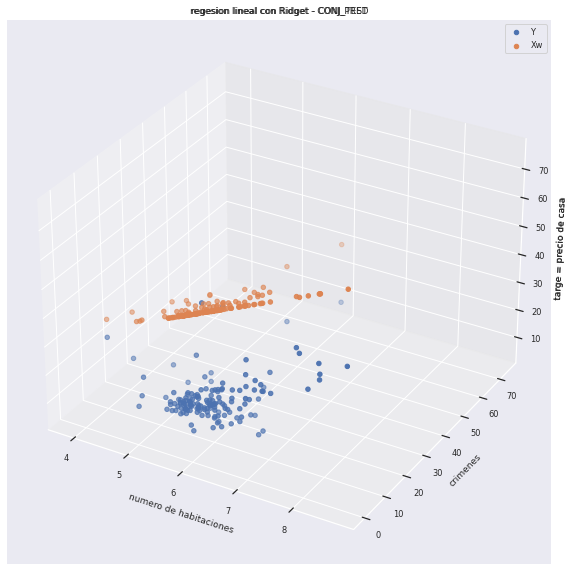

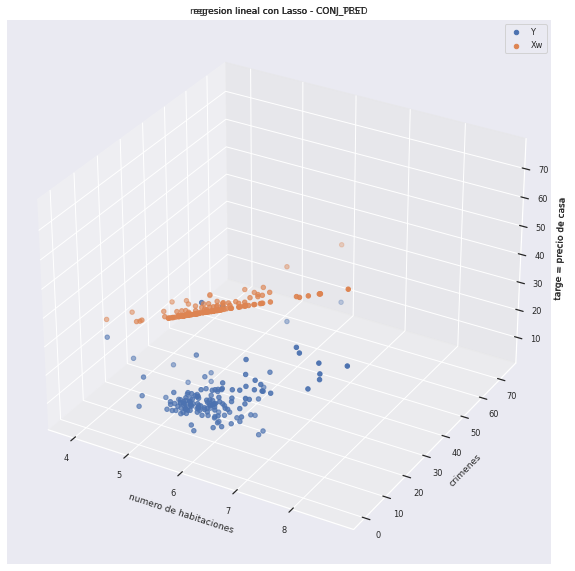

In [192]:
train_errors = [] # list to save training errors in function of polynomial degree-.
val_errors = [] # list to save tests errors in function of polynomial degree-.

coef_reg = np.linspace(start=1e-4, stop=1.0)

# for ival_coef_reg in coef_reg:
ival_coef_reg= 1.0e-2
# entrenamos el modelo de ML con regularizacion de Ridget-.
model_reg_rid= Ridge(alpha= ival_coef_reg,
                     solver='cholesky',
                     fit_intercept=True
                     )
# entrenamos el modelo de ML con regularizacion de Lasso-.
model_reg_lasso= Lasso(alpha= ival_coef_reg,
                       fit_intercept=True
                       )

model_reg_rid.fit(X_train, y_train)
model_reg_lasso.fit(X_train, y_train)

w_rr_coef= model_reg_rid.coef_
w_rl_coef_l= model_reg_lasso.coef_

# predecimos @ modelo Ridget-.
lls_sol= X_train @ w_rr_coef.T
lls_pred = X_test @ w_rr_coef.T
# predecimos @ modelo Lasso-.
lls_sol_l= X_train @ w_rl_coef_l.T
lls_pred_l= X_test @ w_rl_coef_l.T

def plot_3d_lls(x, y, z, lls_sol, title=""):
    # plot
    #    %matplotlib notebook
    # fig = plt.figure(figsize=(8, 8))    
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, label='Y')
    ax.scatter(x, y, lls_sol, label='Xw')
    ax.legend()
    ax.set_xlabel('numero de habitaciones')
    ax.set_ylabel('crimenes')
    ax.set_zlabel('targe = precio de casa')
    ax.set_title(title)

if True: # @ comentado 30052022 --FIG_20--
    # plot 3D modelo entrenado con dos atributos y regularizacion de Ridget-.
    fig = plt.figure(figsize=(12, 10))    
    plot_3d_lls(X_train.RM, X_train.CRIM, y_train, lls_sol, # cambiable-.
                'regesion lineal con Ridget - CONJ_TEST')
    plot_3d_lls(X_test.RM, X_test.CRIM, y_test, lls_pred, # cambiable-.
                'regesion lineal con Ridget - CONJ_PRED')

if True: # @ comentado 30052022 --FIG_21--
    # plot 3D modelo entrenado con dos atributos y regularizacion de Lasso-.
    fig = plt.figure(figsize=(12, 10))    
    plot_3d_lls(X_train.RM, X_train.CRIM, y_train, lls_sol_l, # cambiable-.
                'regesion lineal con Lasso - CONJ_TEST')
    plot_3d_lls(X_test.RM, X_test.CRIM, y_test, lls_pred_l, # cambiable-.
                'regresion lineal con Lasso - CONJ_PRED')


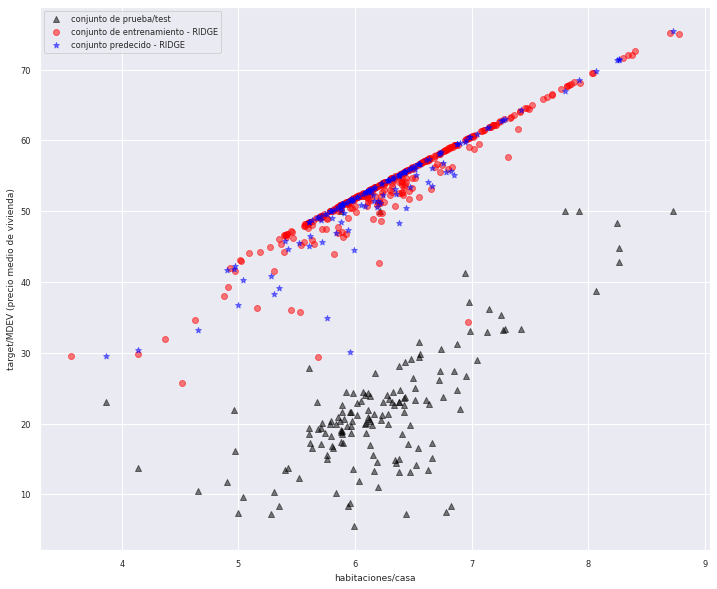

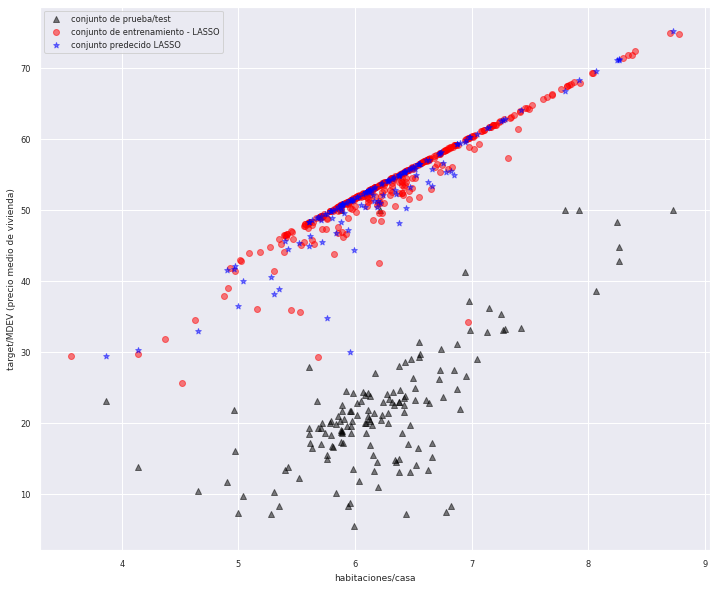

In [193]:
if True: # @ comentado 30052022 --FIG_22--
    figure, ax = plt.subplots(figsize=(12, 10))
    ax= plt.scatter(x= X_test.RM,
                    y= y_test,
                    marker='^',
                    color='black',
                    alpha=0.5,
                    label='conjunto de prueba/test'
                    )
    ax= plt.scatter(x= X_train.RM,
                    y= lls_sol,
                    marker='o',
                    color='red',
                    alpha=0.5,
                    label='conjunto de entrenamiento - RIDGE'
                    )
    ax= plt.scatter(x= X_test.RM,
                    y= lls_pred,
                    marker='*',
                    color='blue',
                    alpha=0.5,
                    label='conjunto predecido - RIDGE'
                    )

    plt.legend()
    plt.grid(True)
    plt.xlabel('habitaciones/casa')
    plt.ylabel('target/MDEV (precio medio de vivienda)')


if True: # @ comentado 30052022 --FIG_23--
    figure, ax = plt.subplots(figsize=(12, 10))
    ax= plt.scatter(x= X_test.RM,
                    y= y_test,
                    marker='^',
                    color='black',
                    alpha=0.5,
                    label='conjunto de prueba/test'
                    )
    ax= plt.scatter(x= X_train.RM,
                    y= lls_sol_l,
                    marker='o',
                    color='red',
                    alpha=0.5,
                    label='conjunto de entrenamiento - LASSO'
                    )
    ax= plt.scatter(x= X_test.RM,
                    y= lls_pred_l,
                    marker='*',
                    color='blue',
                    alpha=0.5,
                    label='conjunto predecido LASSO'
                    )

    plt.legend()
    plt.grid(True)
    plt.xlabel('habitaciones/casa')
    plt.ylabel('target/MDEV (precio medio de vivienda)')

Si bien los resultados mejoran claramente, el modelo tiene un sesgo importante al haber considerado la variable CRIM.